In [1]:
import openpyxl
import warnings
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

warnings.filterwarnings('ignore')

import pandas as pd
dataset=pd.read_excel("./PCOS_data_without_infertility.xlsx",sheet_name=1)


In [2]:
print(pd.isnull(dataset).sum())
from boruta import BorutaPy
from sklearn.feature_selection import chi2,SelectKBest,RFE

import numpy as np


Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [3]:

count=0
for i in dataset['PCOS (Y/N)']:
    if i==1:
        count+=1
print("the number of pcos affected person", +count)


age=[]
freq=[]
dd=list(dataset['Weight (Kg)'])
for i in dataset['Weight (Kg)']:
    if i not in age:
        age.append(i)
        freq.append( dd.count(i))
print(age)
print(freq)



the number of pcos affected person 177
[44.6, 65.0, 68.8, 52.0, 74.1, 64.0, 58.5, 40.0, 71.0, 49.0, 74.0, 50.0, 57.3, 80.5, 43.0, 69.2, 52.4, 85.0, 64.2, 63.0, 42.0, 76.0, 68.0, 62.0, 56.0, 57.0, 58.0, 54.0, 73.0, 72.0, 53.0, 78.0, 33.0, 59.0, 75.0, 51.0, 67.0, 60.0, 55.0, 61.0, 70.0, 48.0, 108.0, 57.6, 43.7, 61.6, 69.5, 74.4, 45.0, 83.5, 62.5, 67.5, 91.4, 61.7, 62.2, 64.3, 68.6, 80.0, 71.2, 83.0, 79.0, 89.0, 53.4, 69.0, 56.4, 49.3, 53.2, 60.8, 46.0, 72.3, 59.6, 73.5, 88.0, 66.0, 66.3, 47.0, 47.8, 76.8, 31.0, 74.3, 58.1, 53.6, 104.0, 63.8, 62.7, 32.0, 35.0, 34.0, 53.5, 64.4, 58.9, 55.1, 55.7, 65.7, 36.0, 55.5, 82.0, 80.4, 77.9, 60.5, 76.9, 65.6, 38.0, 54.7, 71.8, 45.6, 71.5, 44.0, 61.8, 94.0, 66.1, 87.9, 44.8, 49.1, 52.9, 54.3, 63.2]
[1, 25, 1, 27, 3, 17, 1, 10, 8, 3, 5, 34, 1, 1, 3, 1, 1, 5, 1, 16, 5, 4, 15, 15, 22, 12, 13, 19, 3, 7, 12, 5, 2, 12, 4, 7, 7, 36, 20, 15, 10, 12, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 4, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 8, 1, 3, 1, 1, 1

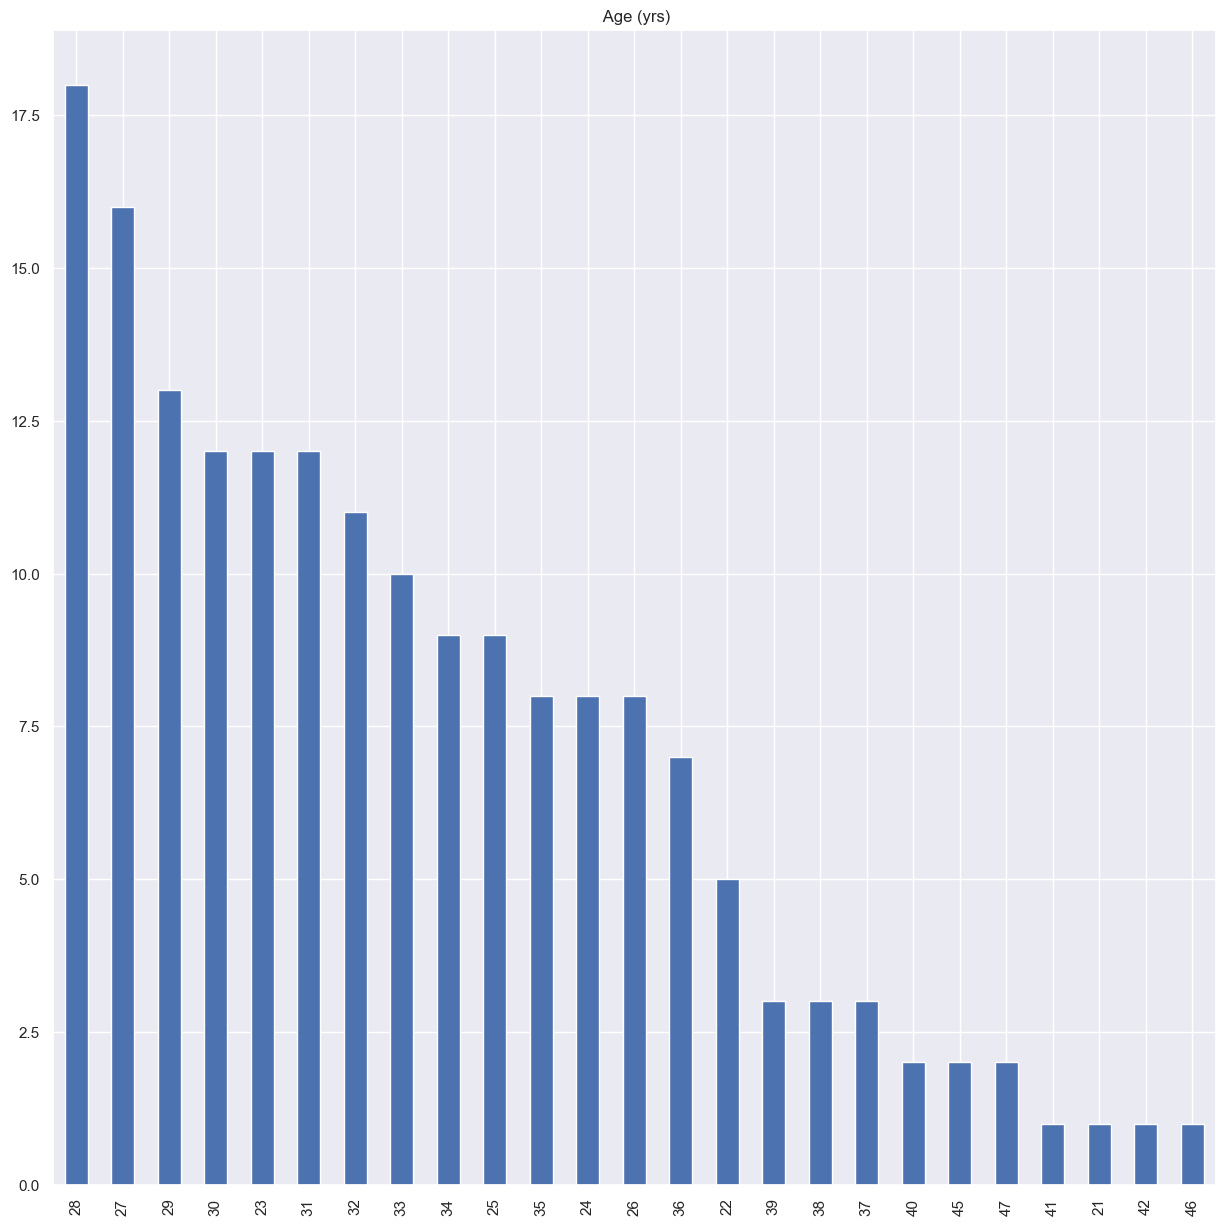

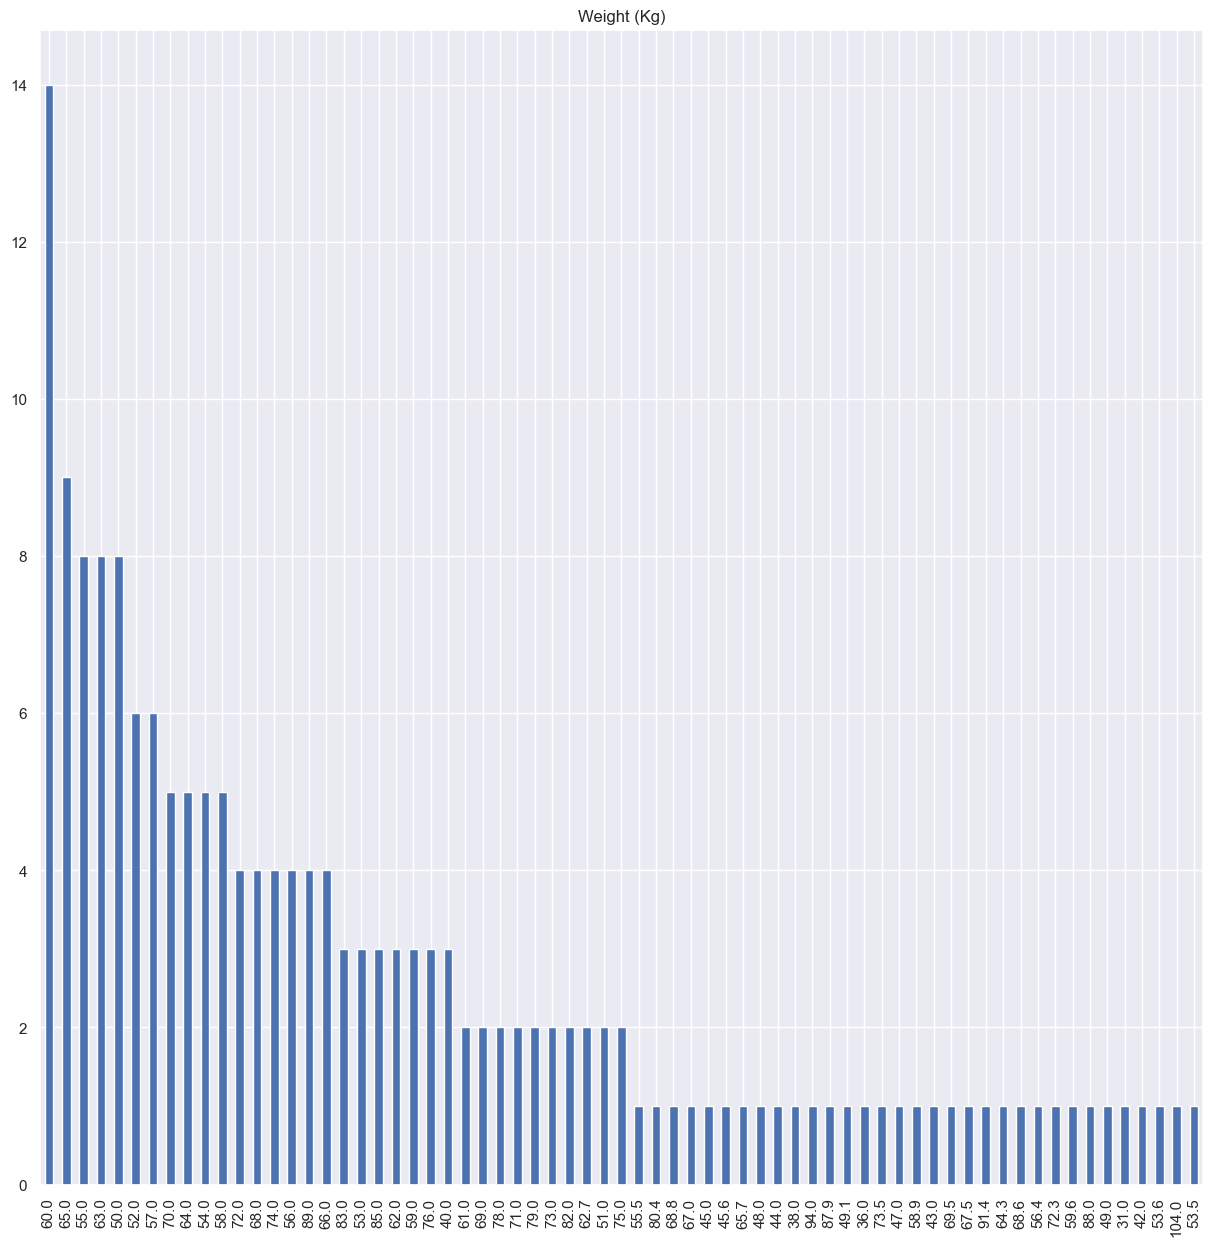

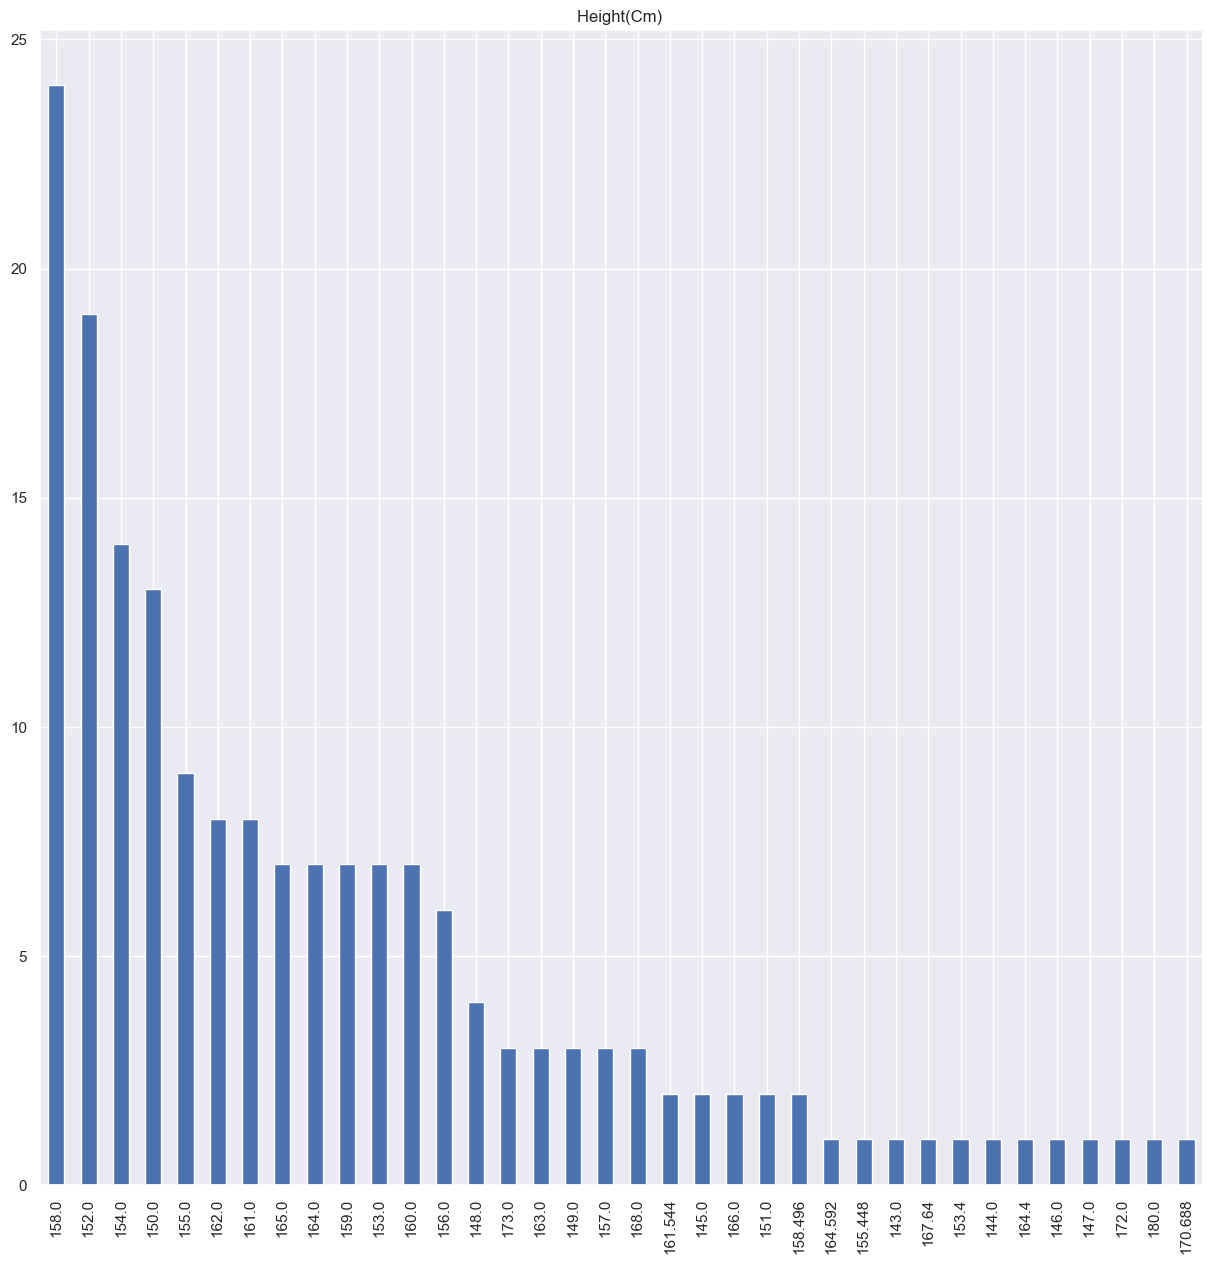

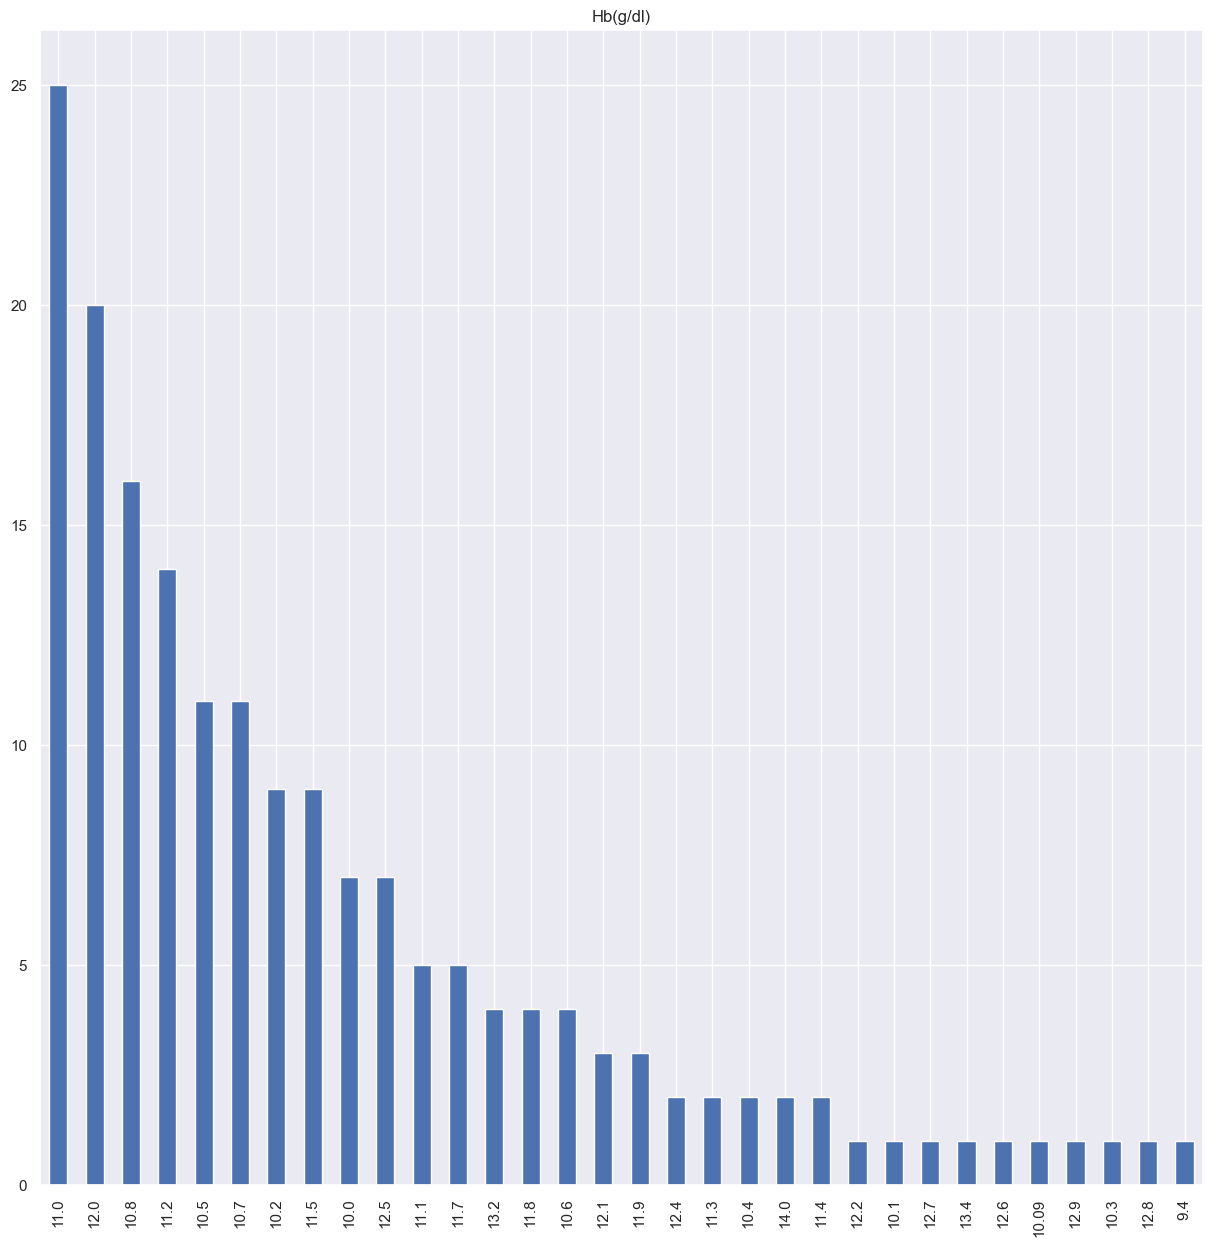

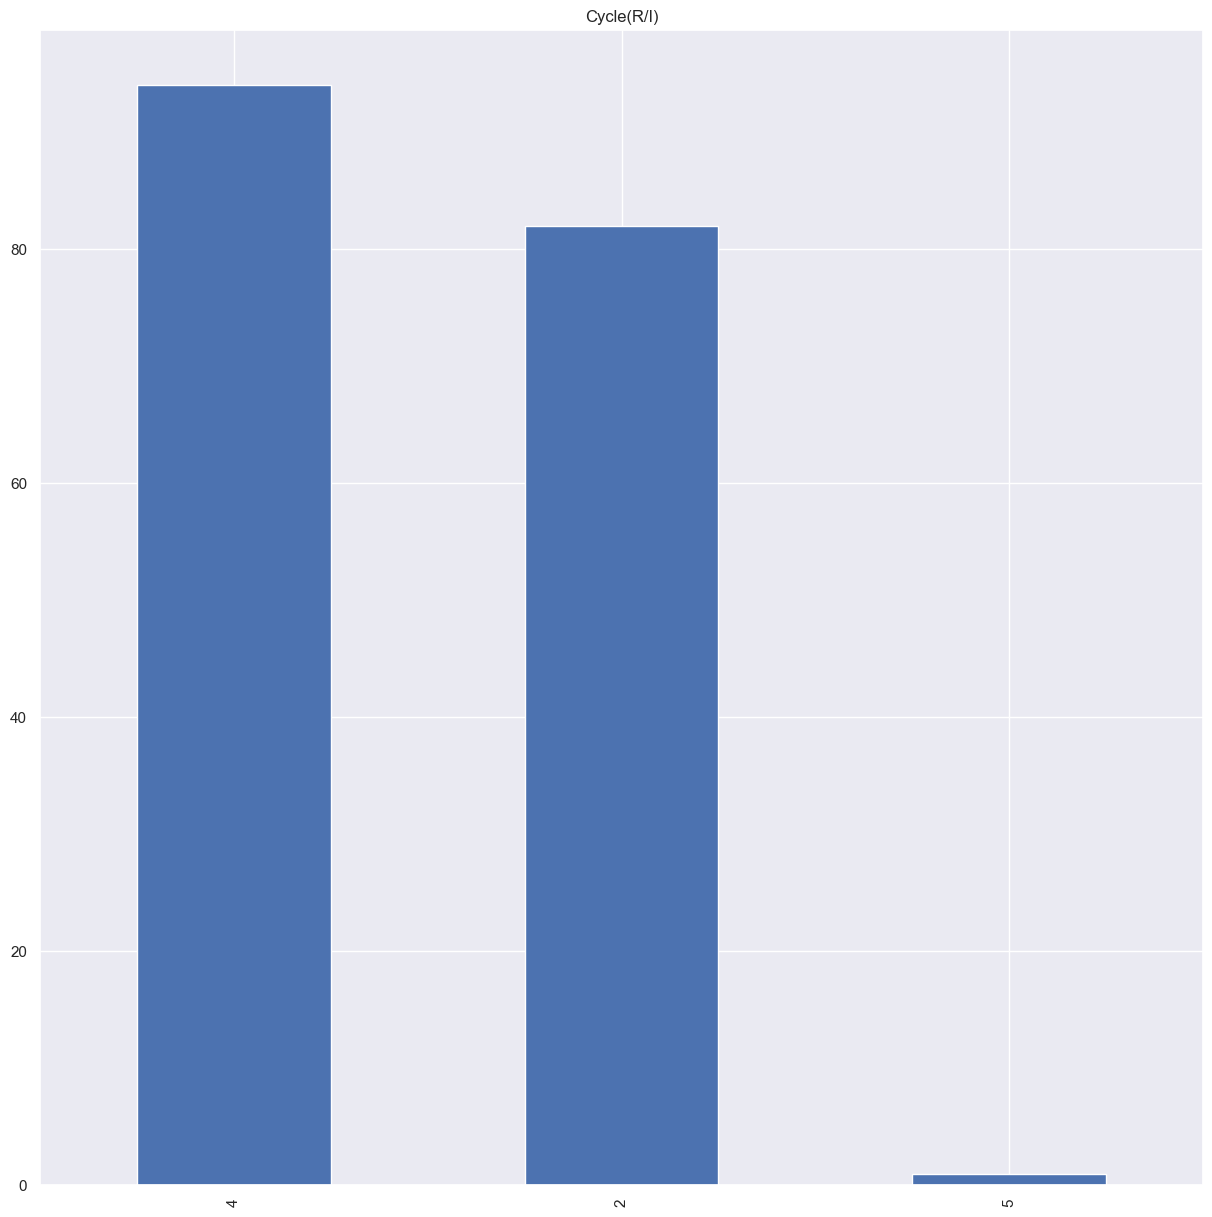

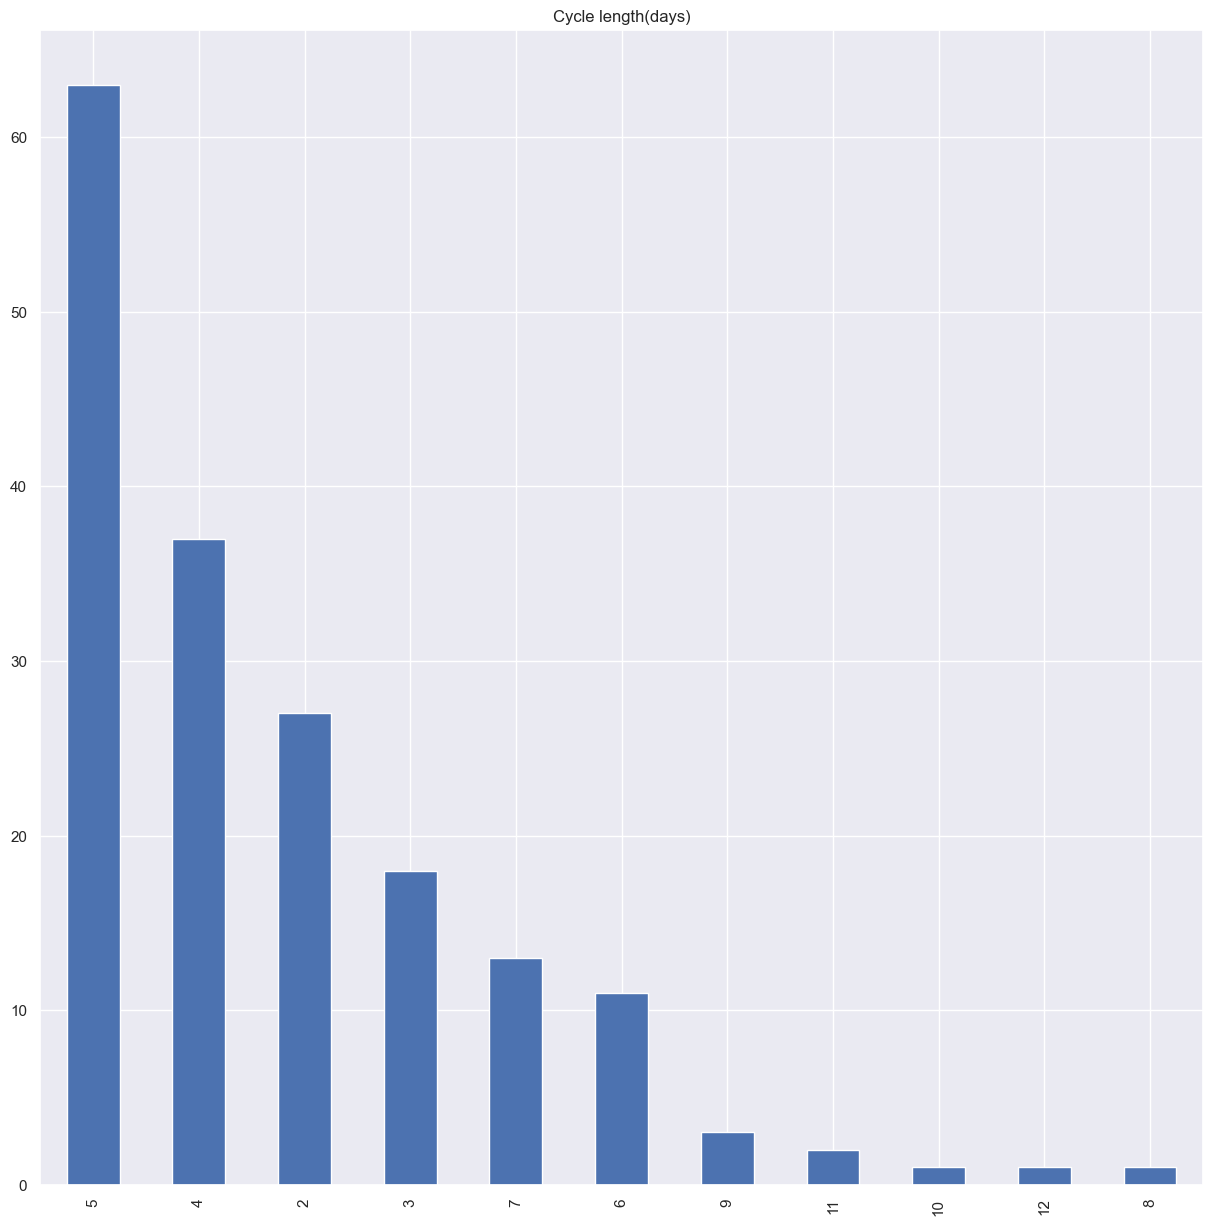

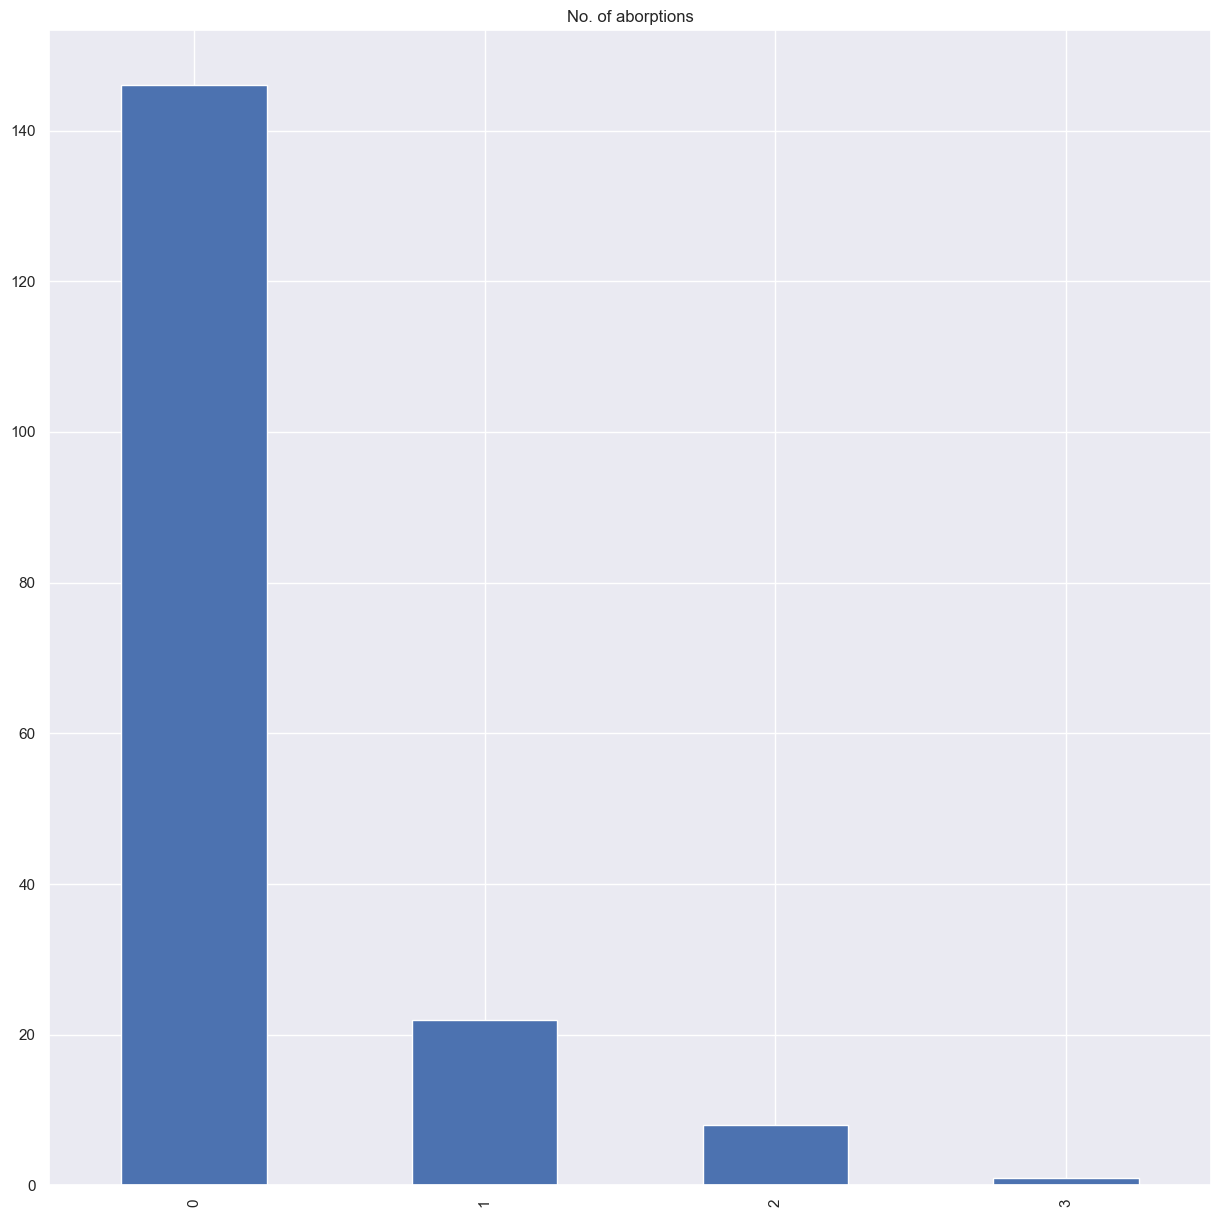

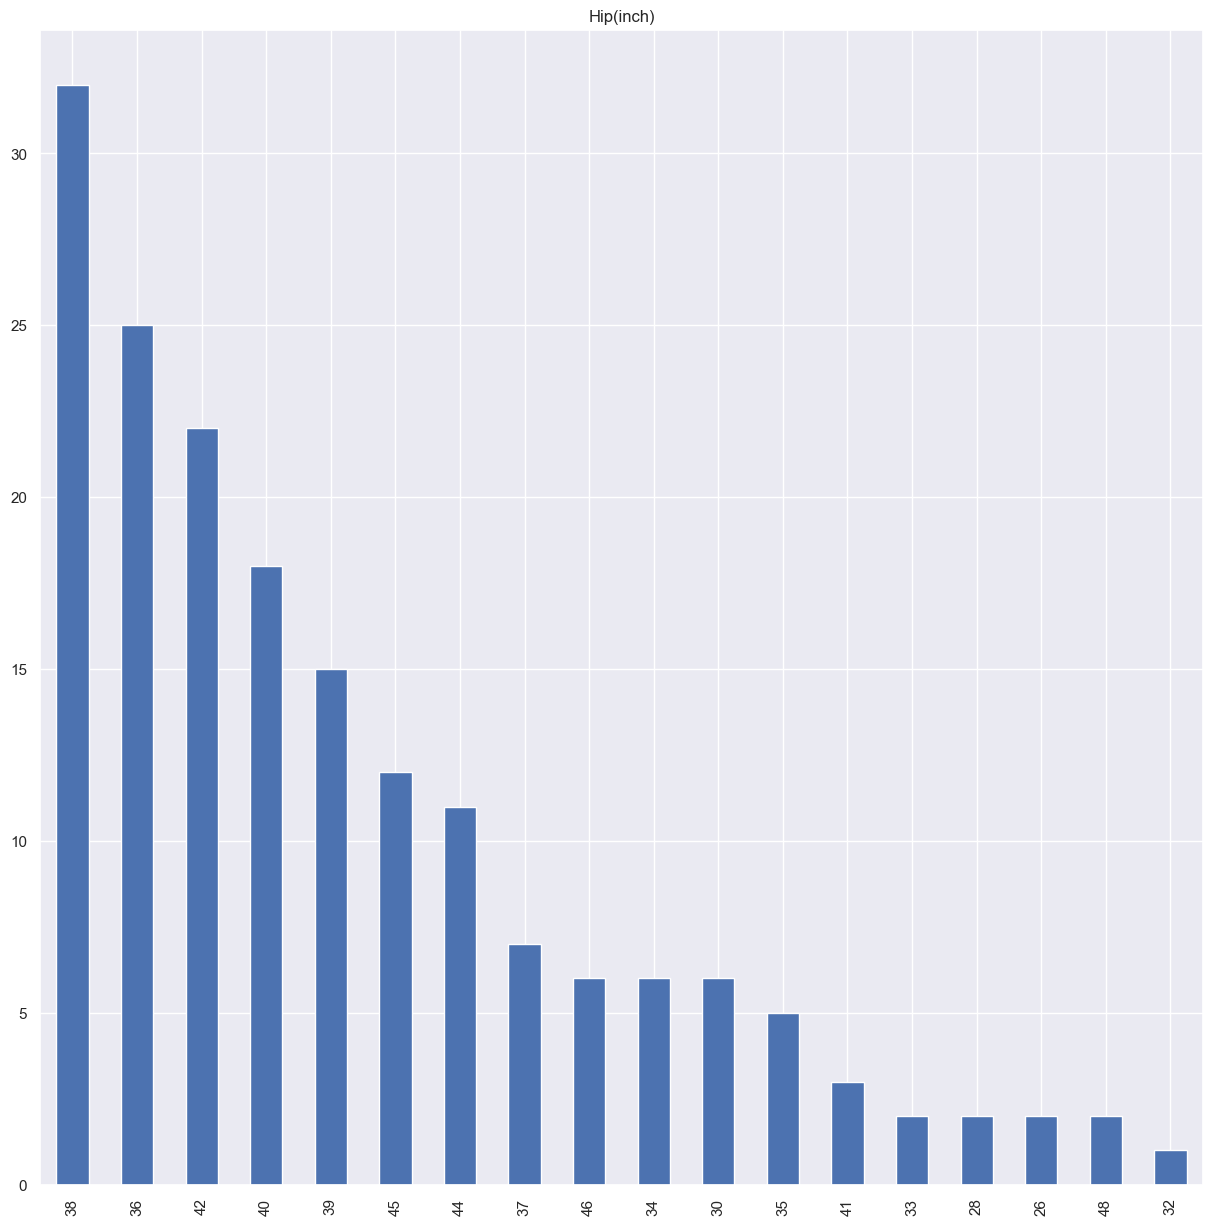

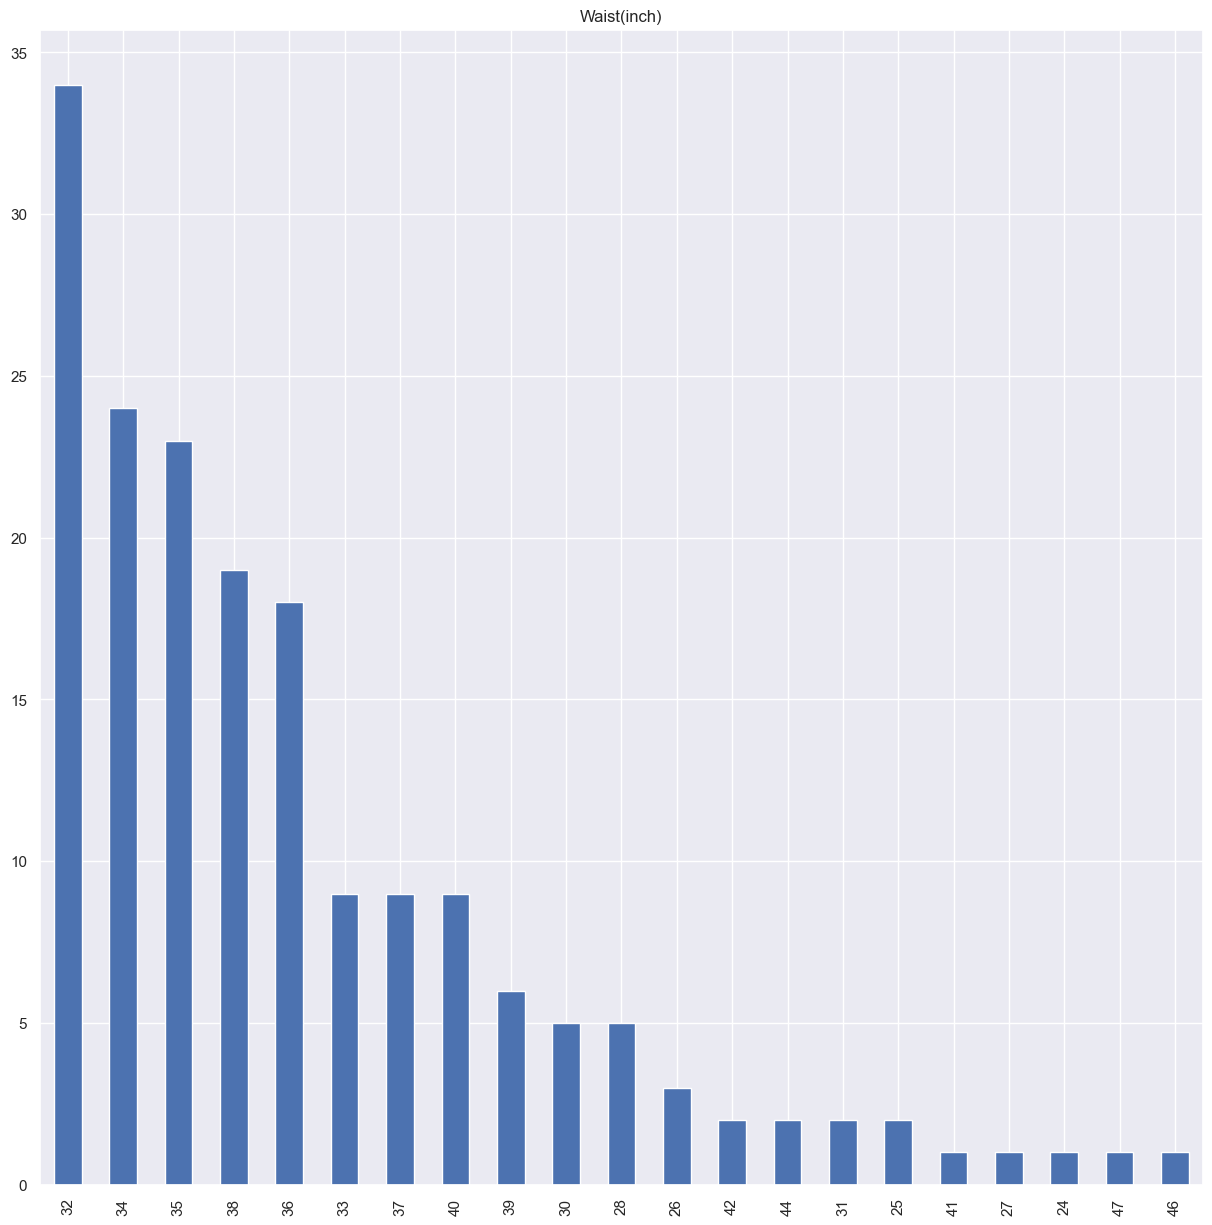

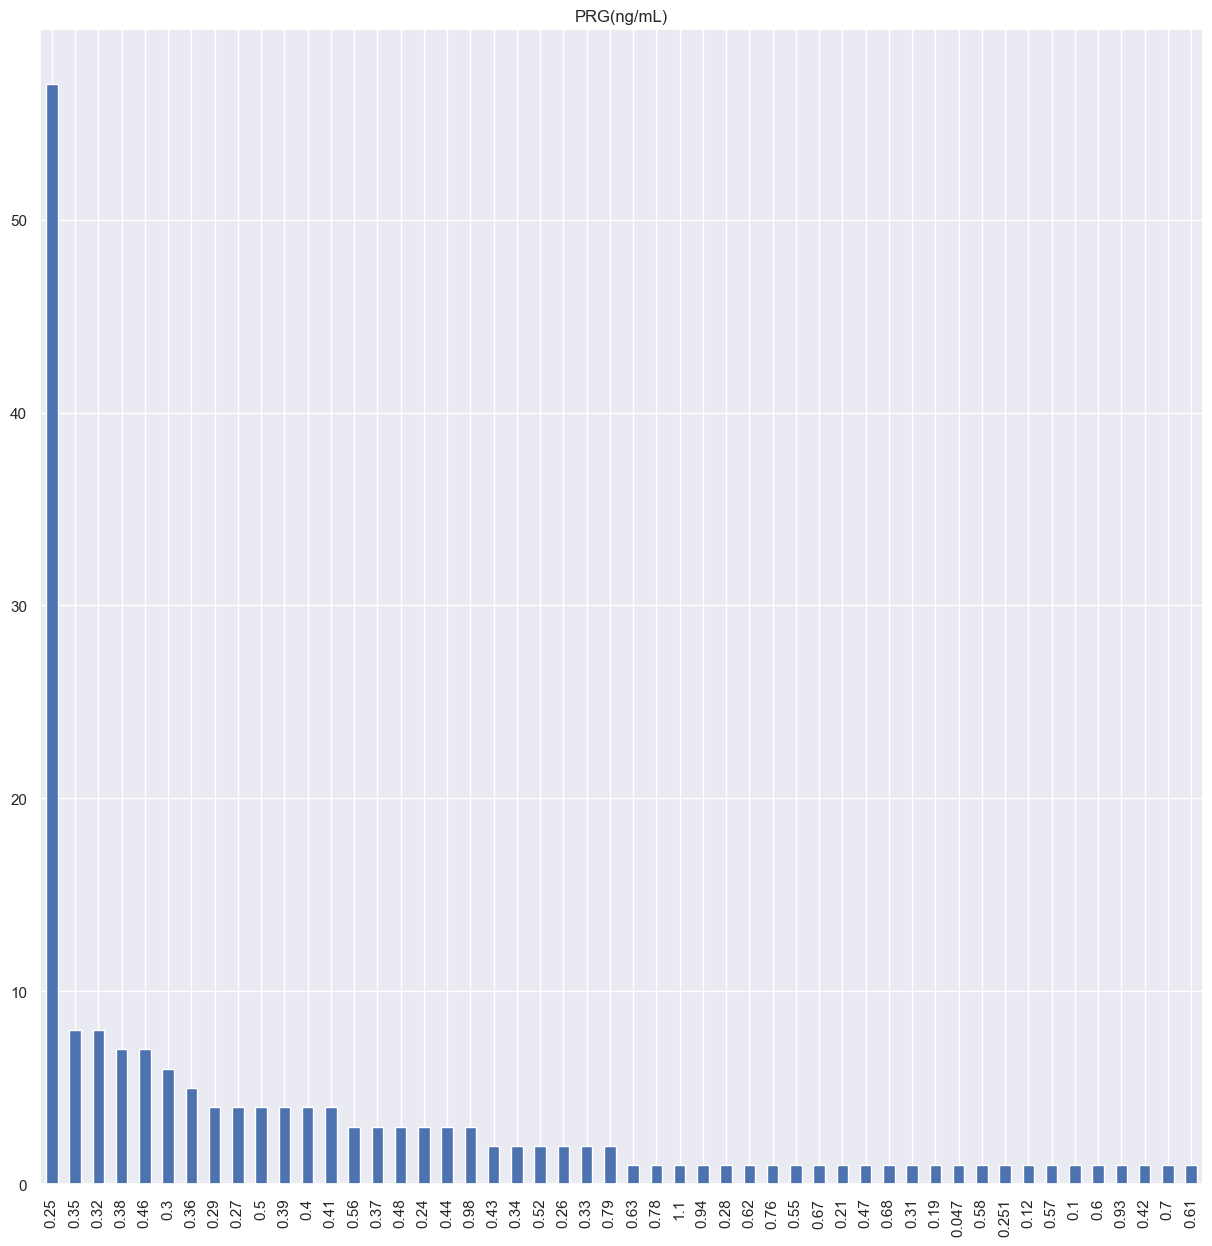

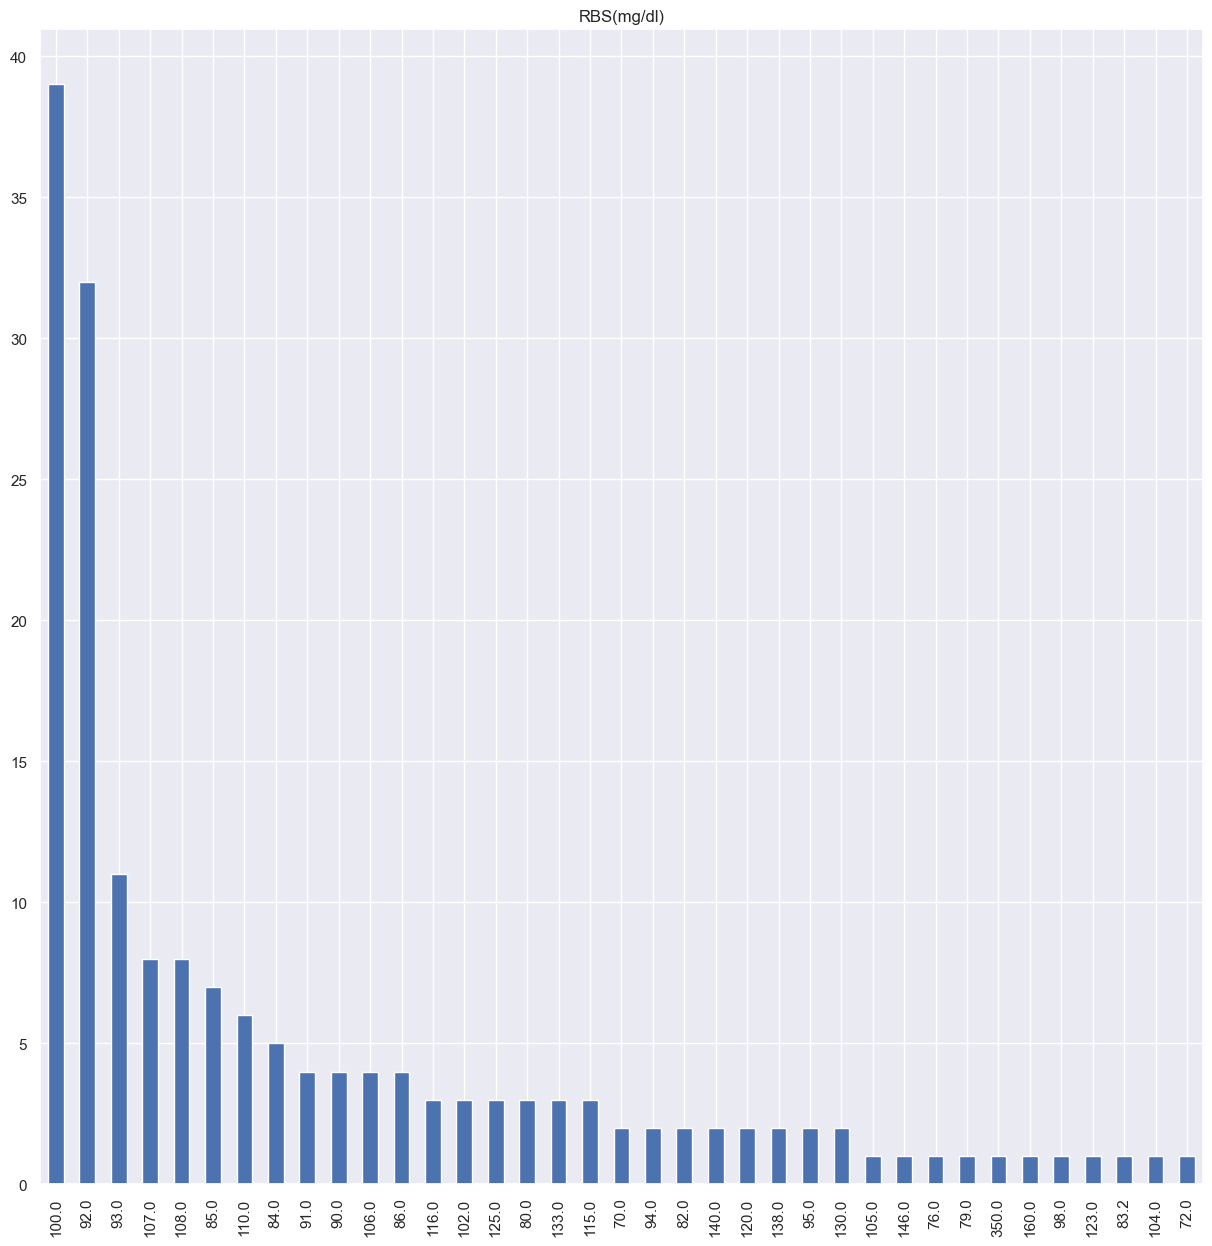

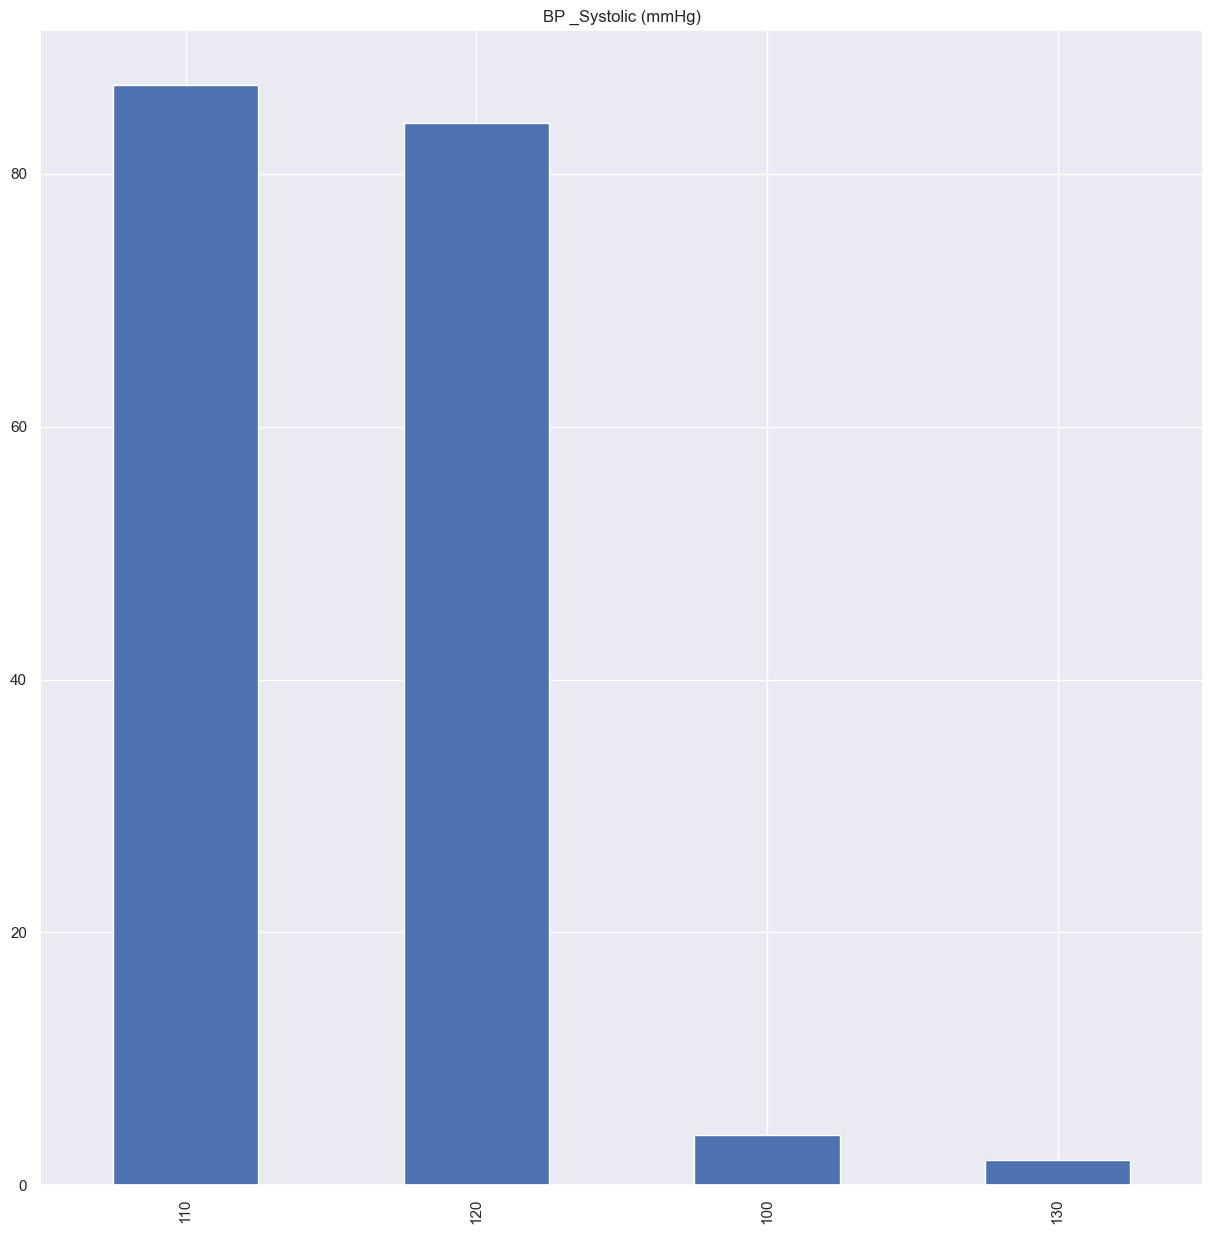

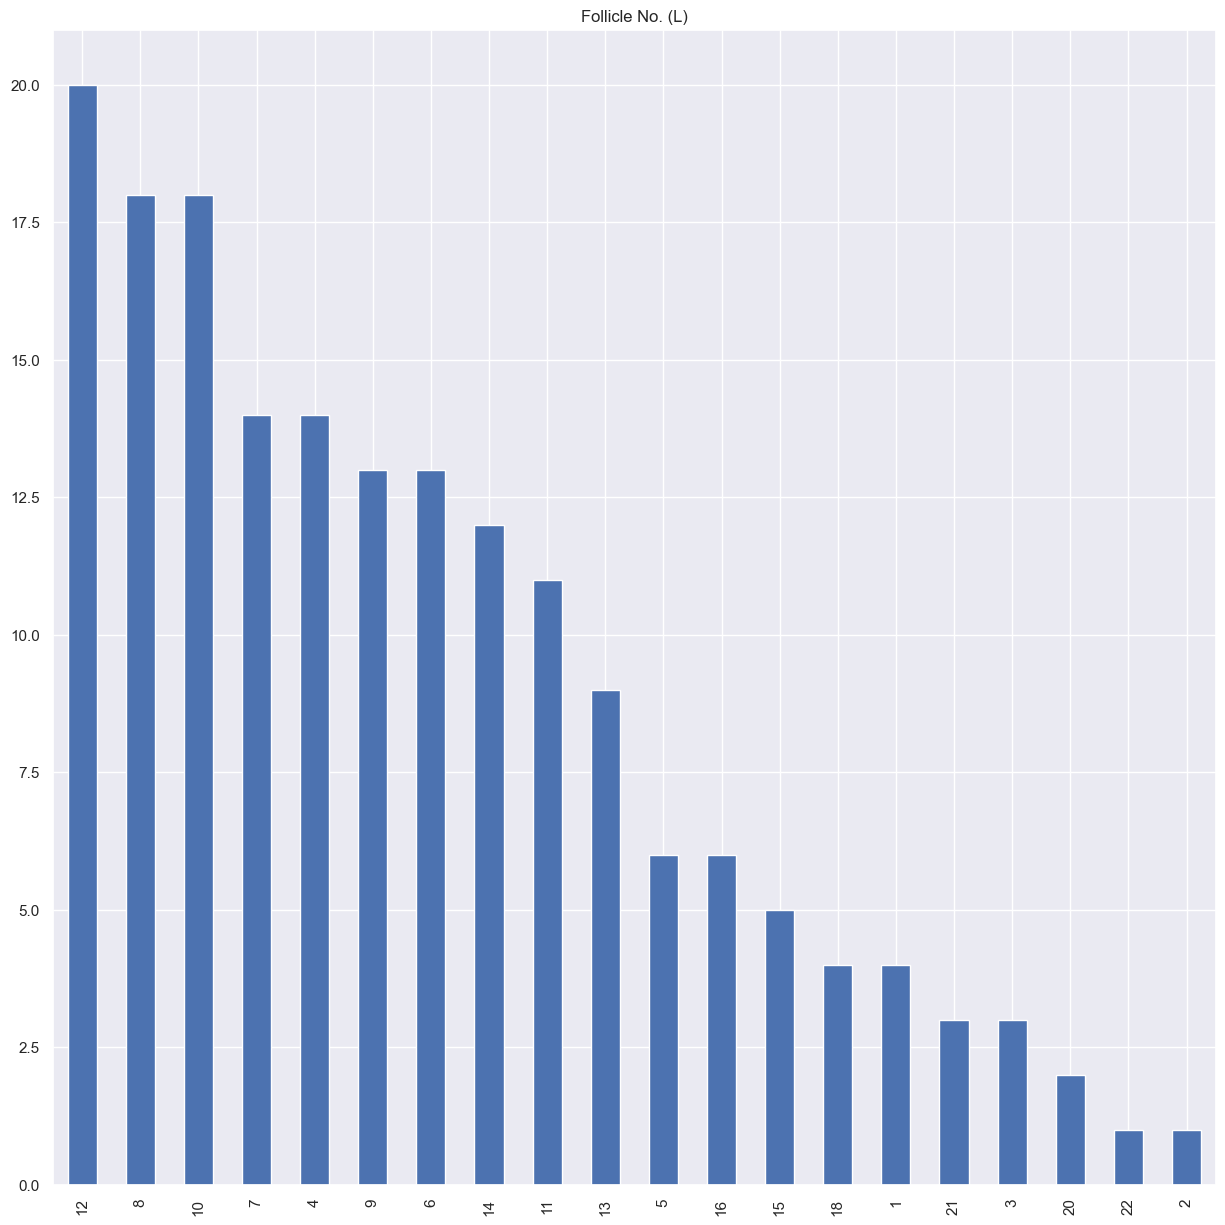

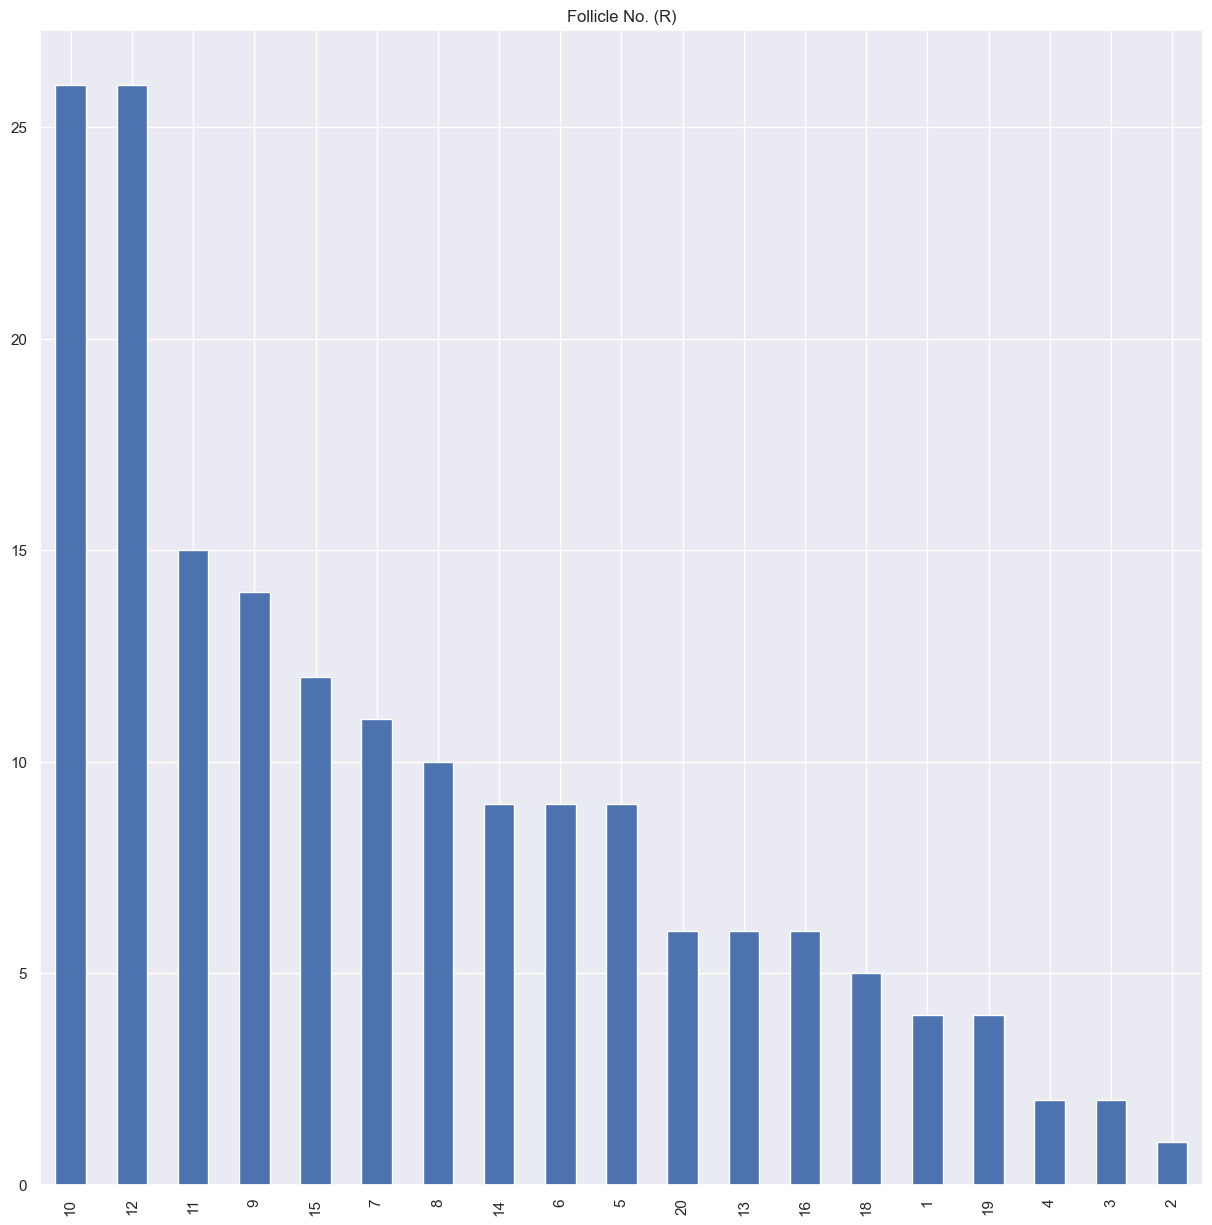

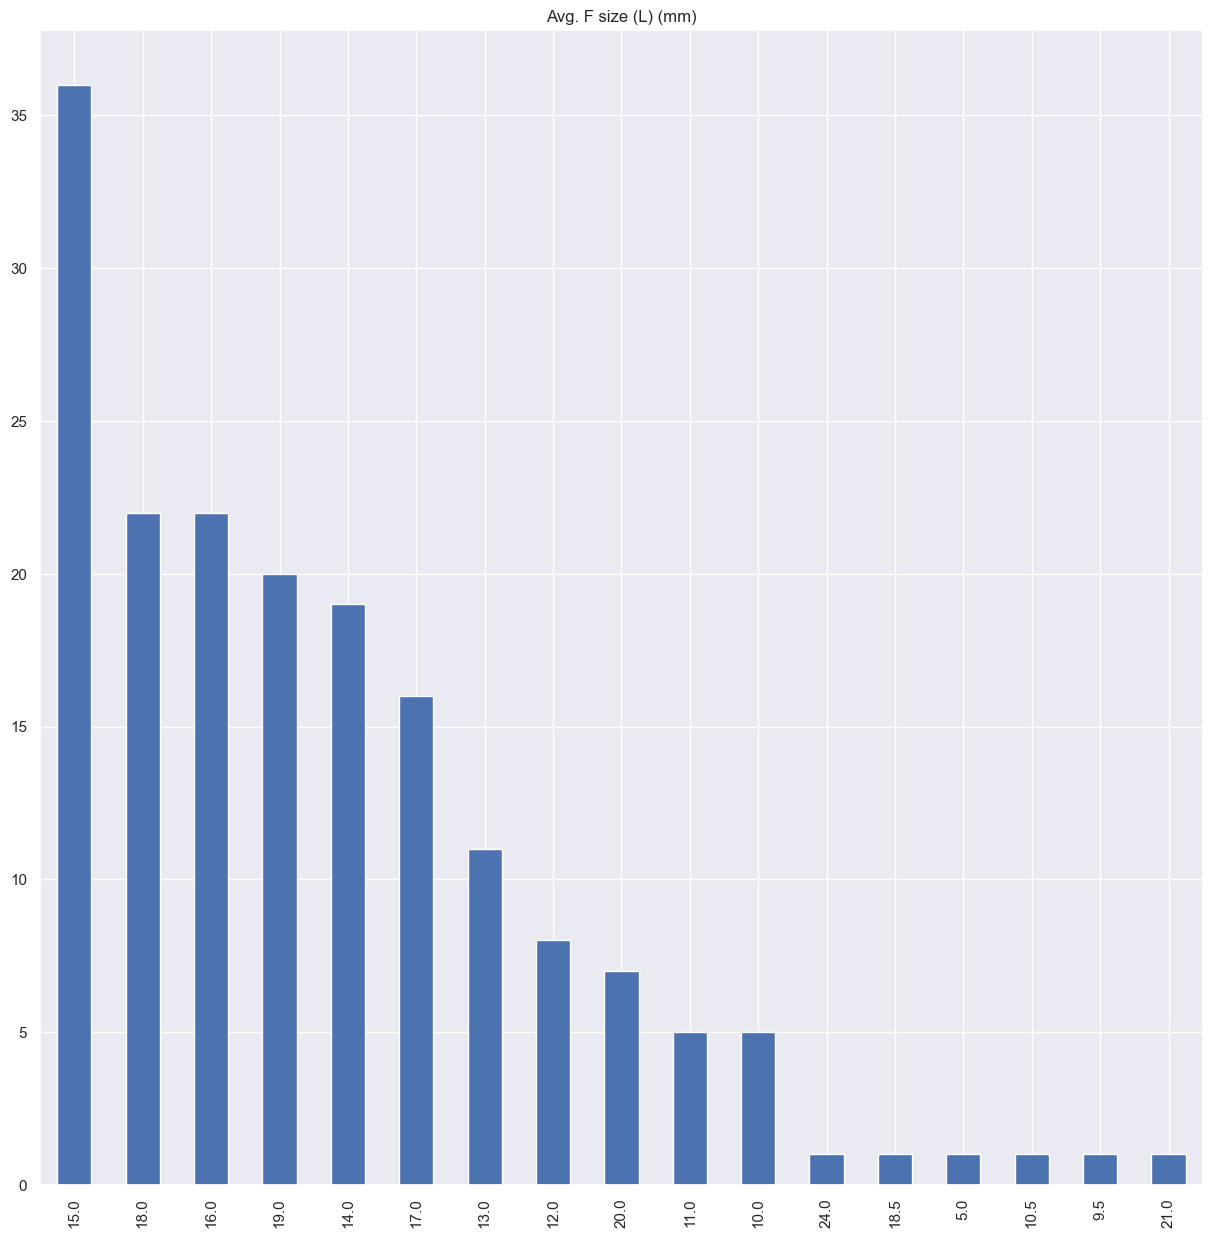

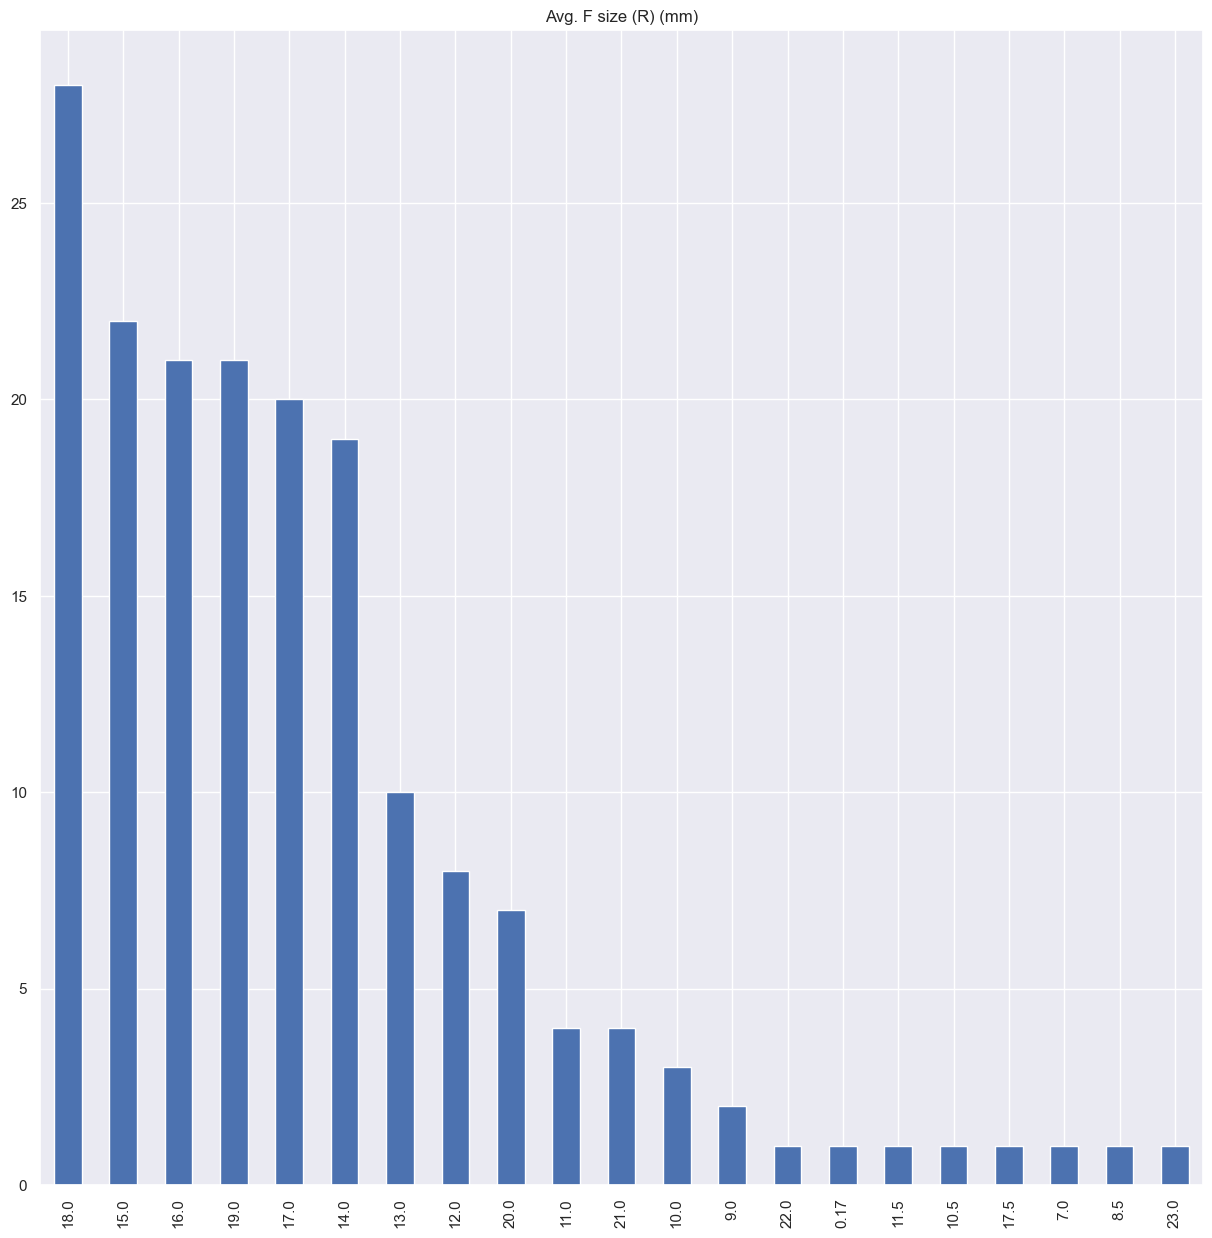

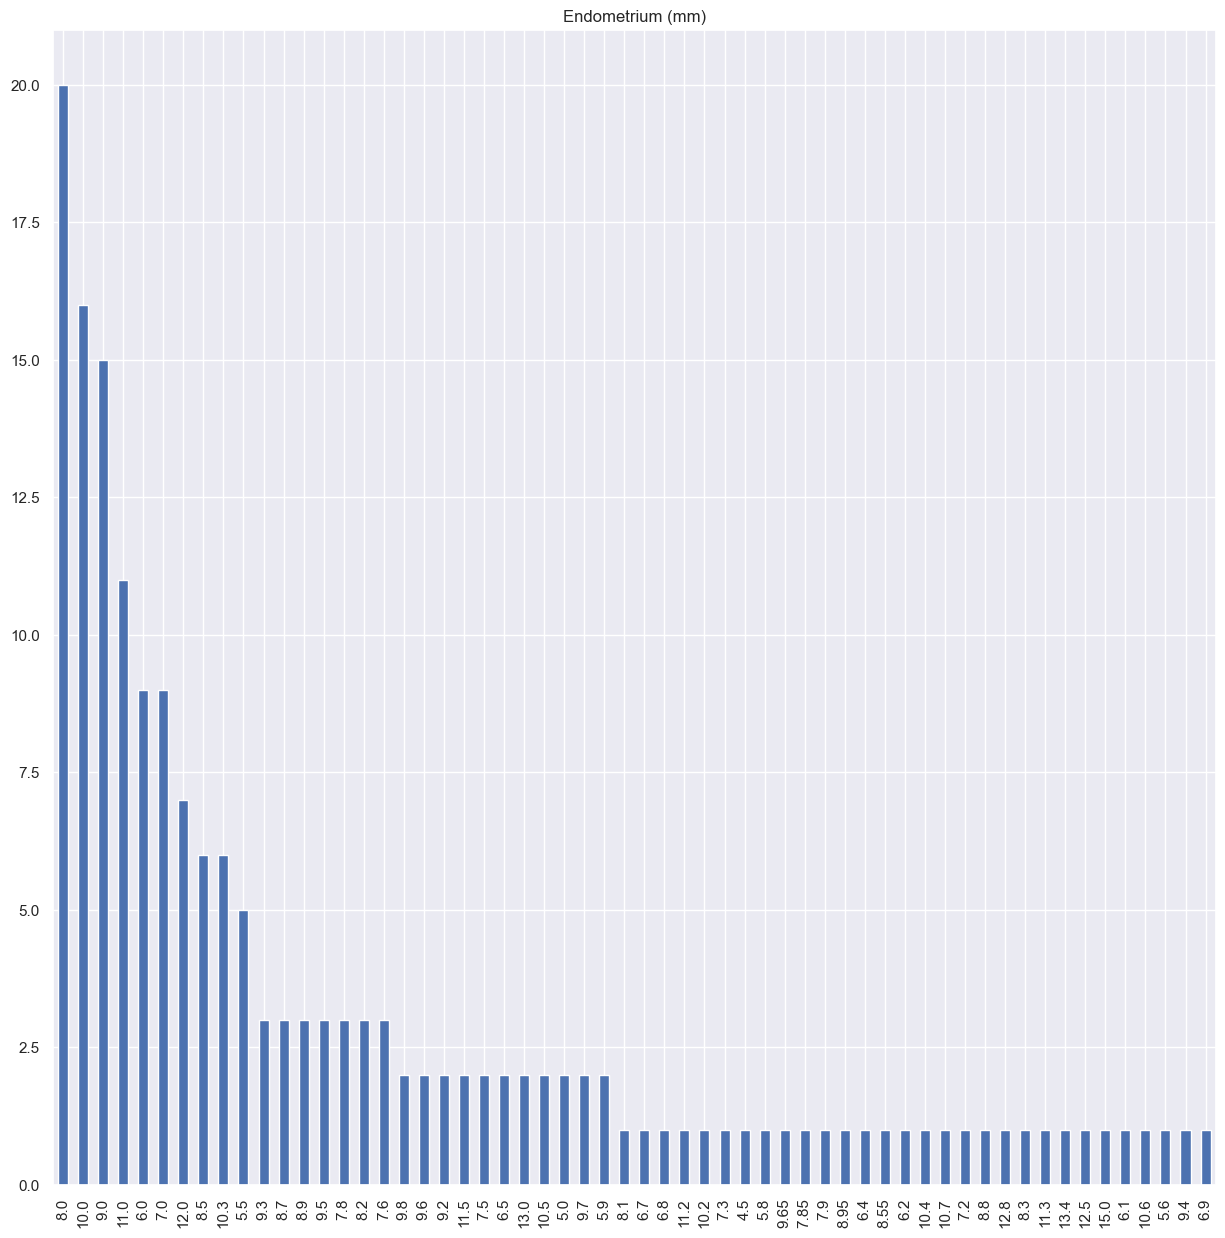

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
for i in [' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'No. of aborptions',
        'Hip(inch)', 'Waist(inch)', 
       'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  dataset[dataset['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

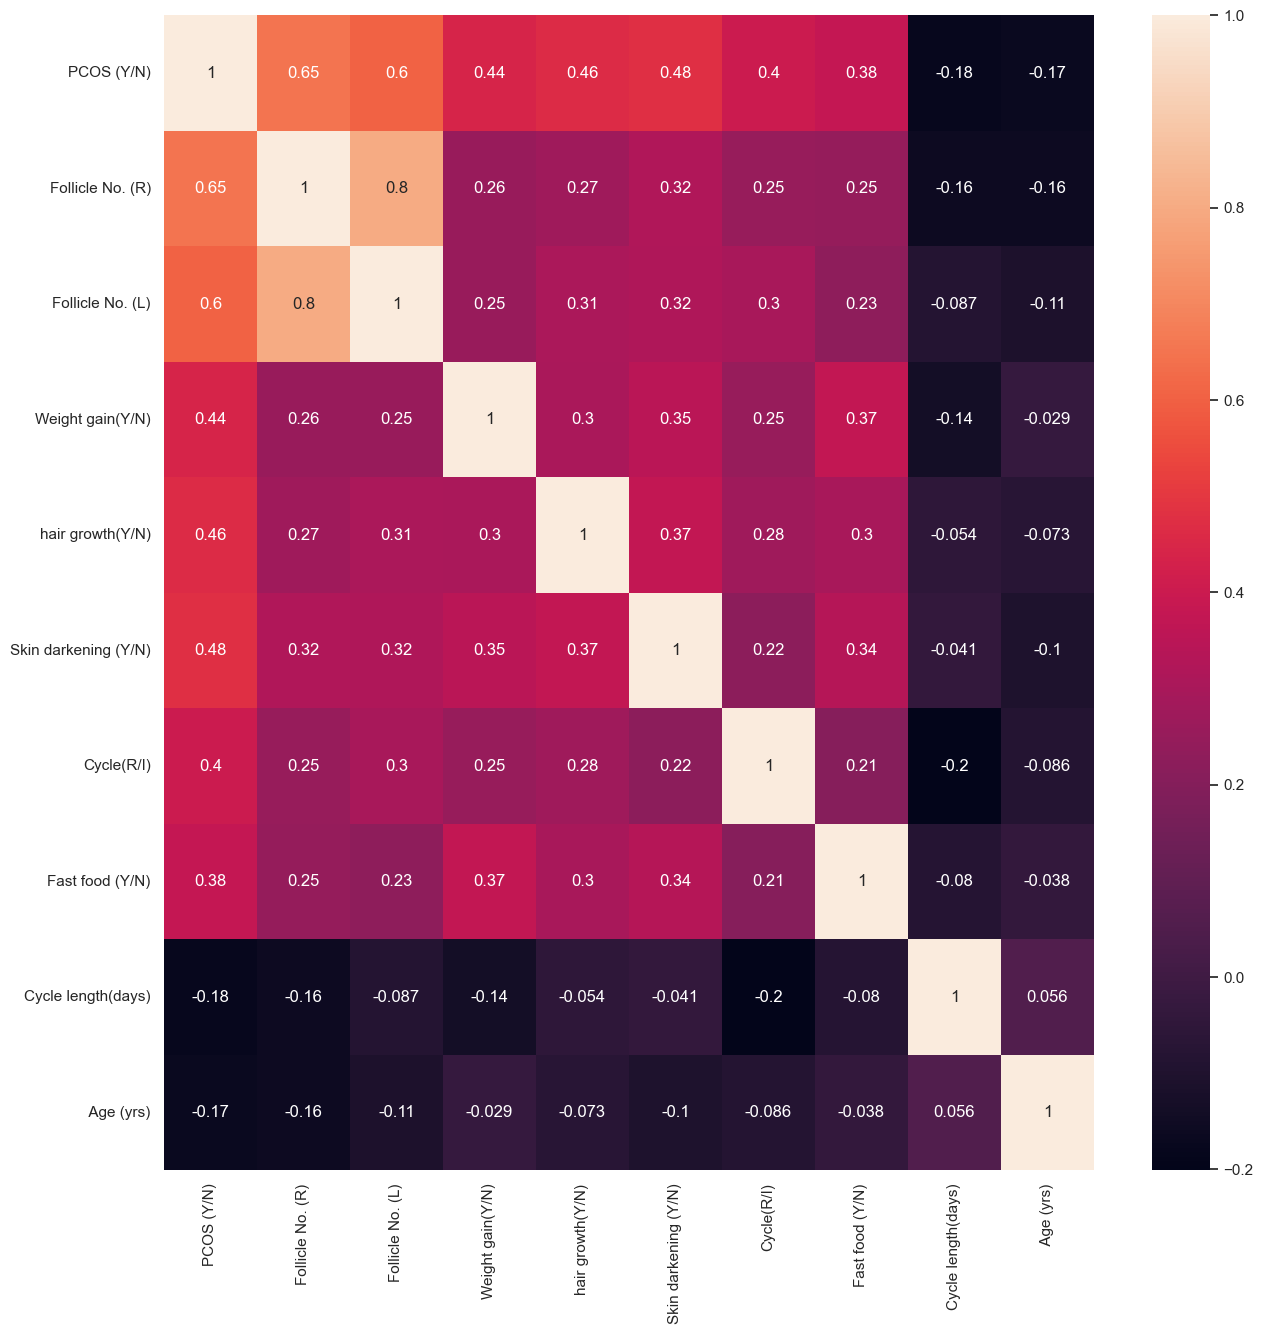

In [5]:
data = dataset[['PCOS (Y/N)','Follicle No. (R)','Follicle No. (L)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Cycle(R/I)','Fast food (Y/N)','Cycle length(days)',' Age (yrs)']]
sns.heatmap(data.corr('pearson'), annot =True )
sns.set(rc = {'figure.figsize':(60,60)})
plt.show()

In [6]:


data =dataset.drop(['Unnamed: 44'], axis=1)
data['Marraige Status (Yrs)'].fillna(0,inplace = True)
data['Fast food (Y/N)'].fillna(0,inplace = True)

print(pd.isnull(data).sum())
y=0
n=0
for i  in data["PCOS (Y/N)"]:
    if i ==1:
        y+=1
    else:
        n+=1
print(y)
print(n)



Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [7]:
data.info()
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.513863,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500270,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


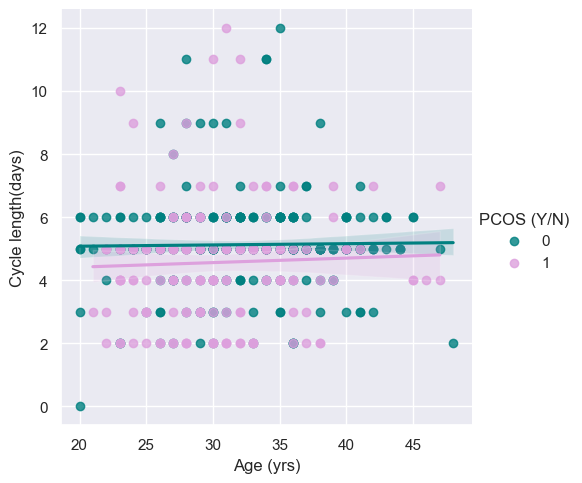

In [9]:
# Length of menstrual phase in PCOS vs normal 
import seaborn as sns
data.columns = [col.strip() for col in data.columns]
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

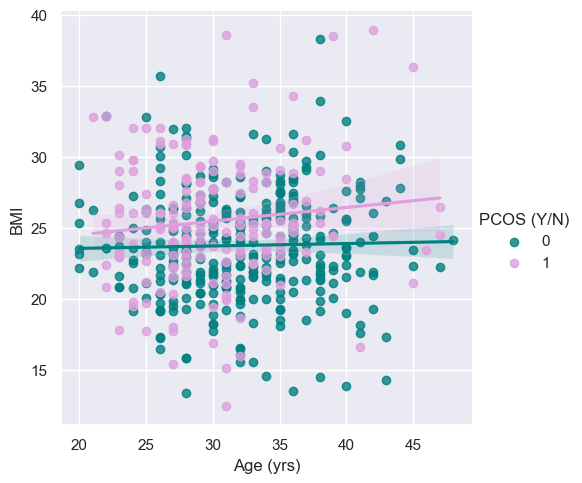

In [10]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

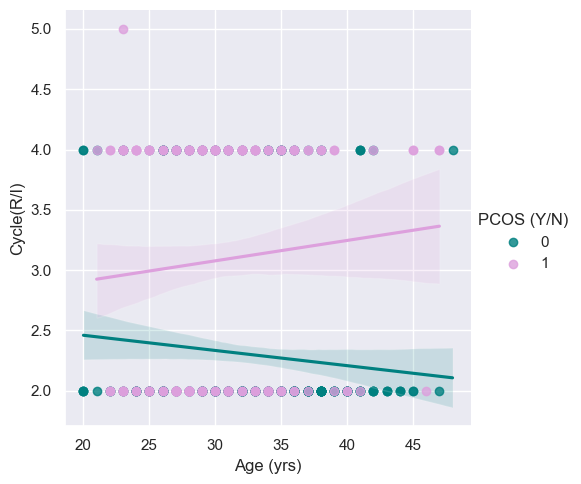

In [11]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

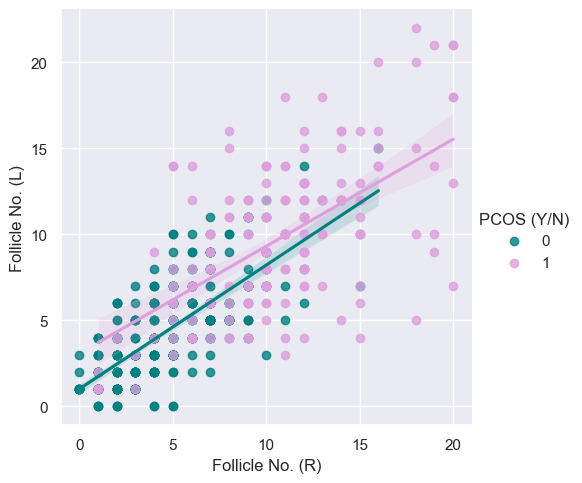

In [12]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

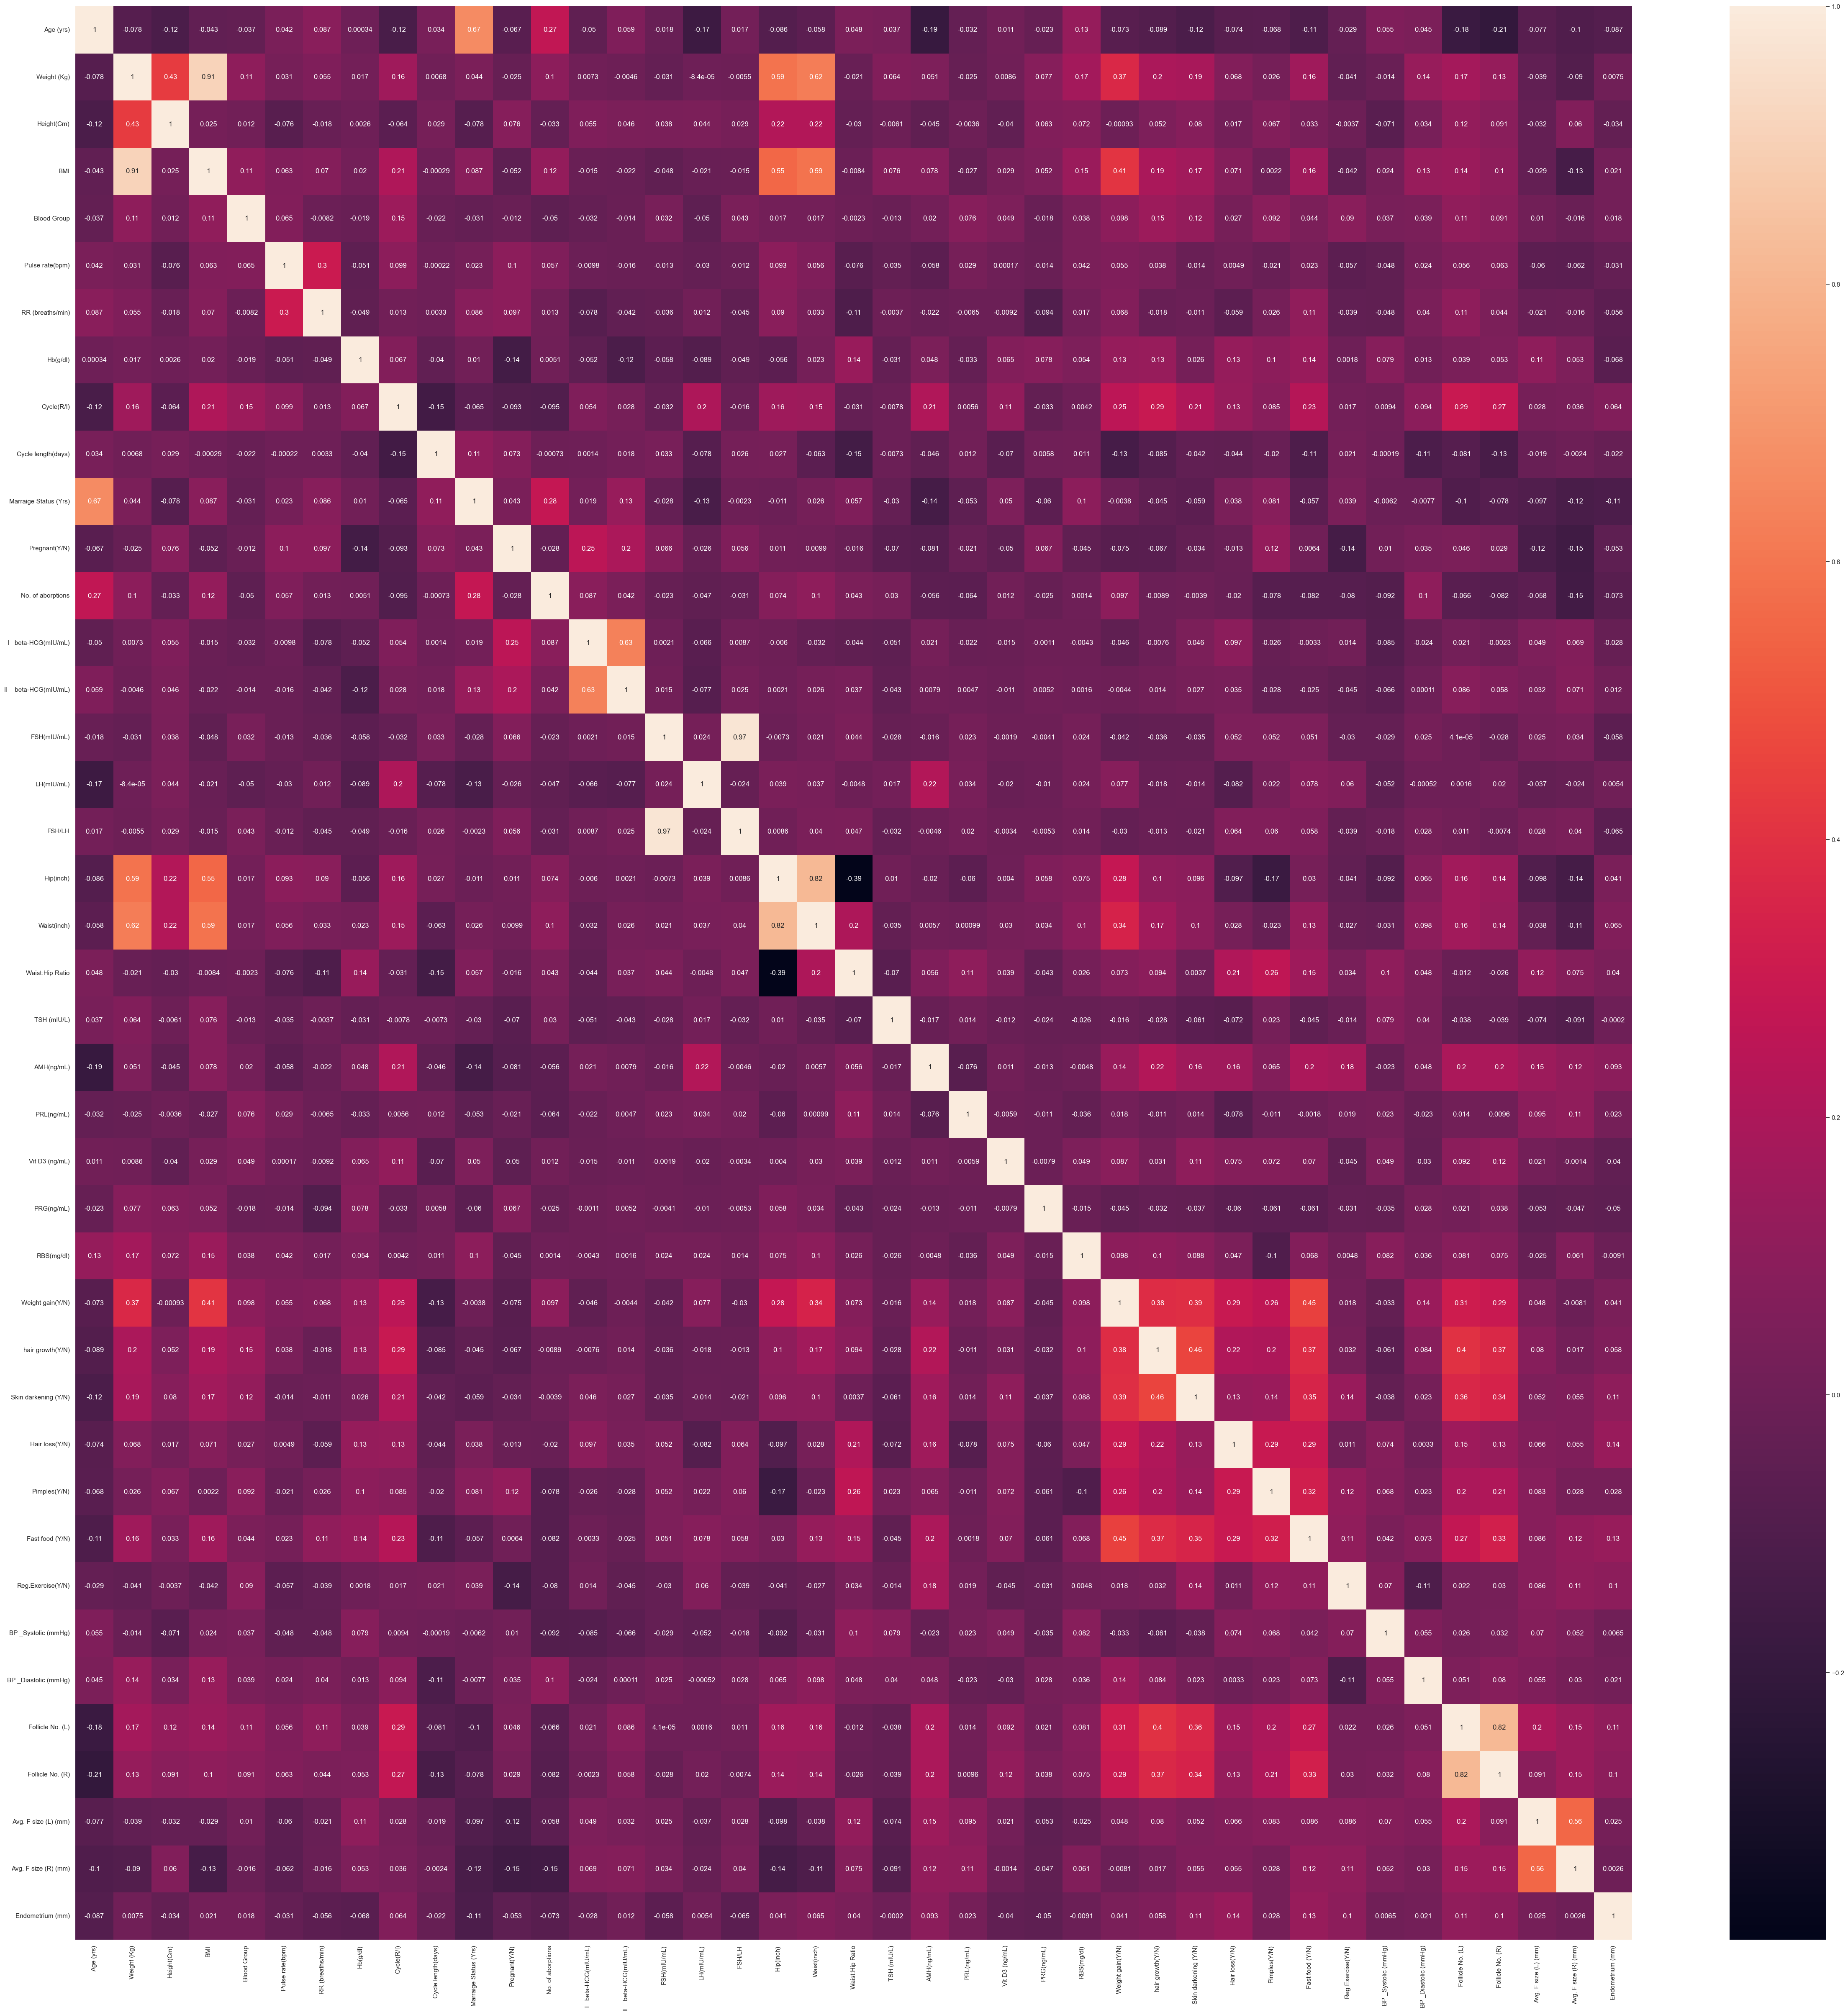

In [13]:
#heat map
import seaborn as sns
from sklearn.model_selection import train_test_split

data['AMH(ng/mL)'].fillna(0,inplace = True)
data['II    beta-HCG(mIU/mL)'].fillna(0,inplace = True)
features=[]
pcosYN=[]
notin=["Sl. No","Patient File No."]
for i in data:
    if i not in notin:
        if i != "PCOS (Y/N)":
            features.append(i)
        else:
            pcosYN.append(i)

# var_train, var_test, res_train, res_test = train_test_split(data[features],data[pcosYN], test_size = 0.3)
#preprocessing balancing the dataset
#smote
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x=data[features]
# y=data[pcosYN]
# x,y= smote.fit_resample(x,y)

#random oversampling
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy=0.7)
x=data[features]
y=data[pcosYN]
# x, y = oversample.fit_resample(x, y)
# y.value_counts()
var_train=x[features].iloc[:379,:]
var_test=x[features].iloc[379:,:]
res_train=y[pcosYN].iloc[:379,:]
res_test=y[pcosYN].iloc[379:,:]

core=var_train.corr()
sns.set(rc = {'figure.figsize':(60,60)})

sns.heatmap(core,annot=True)
plt.show()

In [14]:
y.value_counts()

PCOS (Y/N)
0             364
1             177
dtype: int64

In [15]:
#feature selection (pearson correlation)
atr =[]
temp_atr=[]
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]
for t in range(0,len(thresholds)):
    for i in range(len(core.columns)):
        for j in range(i):
            if abs(core.iloc[i,j])>thresholds[t]:
                col_name=core.columns[i]
                if col_name not in temp_atr:
                    temp_atr.append(col_name)

    # print("Threshold value :{}, attr :{}".format(thresholds[t],atr))
    # print(len(atr))
    atr.append(temp_atr)
    temp_atr=[]
for i in range(len(atr)):
    print("Threshold {} : {}".format(thresholds[i],len(atr[i])))
    print("")

Threshold 0.1 : 34

Threshold 0.2 : 23

Threshold 0.3 : 16

Threshold 0.4 : 12

Threshold 0.5 : 8

Threshold 0.6 : 6

Threshold 0.7 : 4

Threshold 0.8 : 4

Threshold 0.9 : 2

Threshold 0.95 : 1



In [33]:
# #excel sheet

import openpyxl
sheett=1
if sheett ==1:
    wb = openpyxl.load_workbook("Result_sheet_pcos.xlsx")

    sheet = wb.active

    c1 = sheet.cell(row = 1, column = 1)
    c1.value = "Threshold value"

    for i in range(len(thresholds)):
        nn='A'+str(i+2)
        temp=sheet[nn]
        temp.value=thresholds[i]

    c2 = sheet.cell(row= 1 , column = 2)
    c2.value = "decision tree"

    c3 = sheet.cell(row= 1 , column = 3)
    c3.value = "adaboost"

    c4 = sheet.cell(row= 1 , column = 4)
    c4.value = "knn"

    c5 = sheet.cell(row= 1 , column = 5)
    c5.value = "random forest"

    c6 = sheet.cell(row= 1 , column = 6)
    c6.value = "logistic regression"

    c7 = sheet.cell(row= 1 , column = 7)
    c7.value = "gradient boosting"

    c8 = sheet.cell(row= 1 , column = 8)
    c8.value = "cat boosting"

    c9 = sheet.cell(row= 1 , column = 9)
    c9.value = "xg boosting"

    c10 = sheet.cell(row= 1 , column = 10)
    c10.value = " linear svm"

    c11 = sheet.cell(row= 1 , column = 11)
    c11.value = "radial svm"

    c12 = sheet.cell(row= 1 , column = 12)
    c12.value = "linear discriminant analysis"

    c13 = sheet.cell(row= 1 , column = 13)
    c13.value = " Quadratic Discriminant Analysis"

    fs_no=sheet["A13"]
    fs_no.value="without feature selection"


    forward_selection=sheet["A15"]
    forward_selection.value="forward selection"

    backward_selection=sheet["A17"]
    backward_selection.value="backward selection"

    Recursive_selection=sheet["A19"]
    Recursive_selection.value="Recursive feature selection"
     
    Chi_square_selection=sheet["A21"]
    Chi_square_selection.value="Chi_Square feature selection"

    Boruta_selection=sheet["A23"]
    Boruta_selection.value="Boruta feature selection"

    wb.save("Result_sheet_pcos.xlsx")

else:


    wb = openpyxl.load_workbook("smote_Result_sheet_pcos.xlsx")
    
    sheet = wb.active
    
    c1 = sheet.cell(row = 1, column = 1)
    c1.value = "Threshold value"
    
    for i in range(len(thresholds)):
        nn='A'+str(i+2)
        temp=sheet[nn]
        temp.value=thresholds[i]
    
    c2 = sheet.cell(row= 1 , column = 2)
    c2.value = "decision tree"
    
    c3 = sheet.cell(row= 1 , column = 3)
    c3.value = "adaboost"
    
    c4 = sheet.cell(row= 1 , column = 4)
    c4.value = "knn"
    
    c5 = sheet.cell(row= 1 , column = 5)
    c5.value = "random forest"
    
    c6 = sheet.cell(row= 1 , column = 6)
    c6.value = "logistic regression"
    
    c7 = sheet.cell(row= 1 , column = 7)
    c7.value = "gradient boosting"
    
    c8 = sheet.cell(row= 1 , column = 8)
    c8.value = "cat boosting"
    
    c9 = sheet.cell(row= 1 , column = 9)
    c9.value = "xg boosting"
    
    c10 = sheet.cell(row= 1 , column = 10)
    c10.value = " linear svm"
    
    c11 = sheet.cell(row= 1 , column = 11)
    c11.value = "radial svm"
    
    c12 = sheet.cell(row= 1 , column = 12)
    c12.value = "linear discriminant analysis"
    
    c13 = sheet.cell(row= 1 , column = 13)
    c13.value = " Quadratic Discriminant Analysis"
    
    fs_no=sheet["A13"]
    fs_no.value="without feature selection"
    
    
    forward_selection=sheet["A15"]
    forward_selection.value="forward selection"
    
    backward_selection=sheet["A17"]
    backward_selection.value="backward selection"
    
    Recursive_selection=sheet["A19"]
    Recursive_selection.value="Recursive feature selection"
    
    wb.save("smote_Result_sheet_pcos.xlsx")
    
        
    

In [86]:
#flag =0 means pearson correlation feature selection method
#flag =1 means wrapper forward feature selection
#flag !=0 or 1 means without feature selection
t_or_f=False


flag=4

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [22]:
#RFE feature selection
rfe_features=[]
rfefeatures=[]
alg=[DecisionTreeClassifier(),
AdaBoostClassifier(random_state=29),
RandomForestRegressor(n_estimators = 70, random_state = 0),
LogisticRegression(random_state = 0), 
GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0),
CatBoostClassifier(iterations=4,learning_rate=0.1),
XGBClassifier(),
SVC(kernel='linear'),
LinearDiscriminantAnalysis()]
for i in alg:
    rfe = RFE(estimator=i, n_features_to_select=30)
    rfe.fit(var_train, res_train)
    for i,col in zip(range(var_train.shape[1]),var_train.columns):
        if rfe.support_[i]:
            rfefeatures.append(col)
    rfe_features.append(rfefeatures)
    rfefeatures=[]

#knn,radial svm,Qda

In [23]:
fg=0
unique_rfe_features=[]
for i in rfe_features:
    for j in i:
        for jj in rfe_features:
            if j not in jj:
                fg=1 
        if fg==0:
            if j not in unique_rfe_features:
                unique_rfe_features.append(j)
        else:
            fg=0

print(unique_rfe_features)

['Hb(g/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (R) (mm)']


In [49]:
#chi sqaure
chi_score=chi2(var_train,res_train)
chi_values=pd.Series(chi_score[0],index=var_train.columns)
chi_values.sort_values(ascending=False,inplace=True)
print(chi_values)
chi_square_features=["I   beta-HCG(mIU/mL)","Vit D3 (ng/mL)","FSH(mIU/mL)","II    beta-HCG(mIU/mL)","Follicle No. (R)","Follicle No. (L)","AMH(ng/mL)","FSH/LH"]

I   beta-HCG(mIU/mL)      21639.575634
Vit D3 (ng/mL)            11951.746778
FSH(mIU/mL)                1708.152335
II    beta-HCG(mIU/mL)     1337.147739
Follicle No. (R)            426.326876
Follicle No. (L)            407.378907
AMH(ng/mL)                  225.977334
FSH/LH                      102.011001
hair growth(Y/N)             96.120609
Skin darkening (Y/N)         72.885633
Weight gain(Y/N)             59.568915
Weight (Kg)                  41.344638
Fast food (Y/N)              38.916224
Cycle(R/I)                   17.958873
PRG(ng/mL)                   17.351084
Pimples(Y/N)                 16.243723
RBS(mg/dl)                   14.609667
Marraige Status (Yrs)        12.625060
BMI                          11.872828
Hair loss(Y/N)               11.070979
Age (yrs)                    10.403577
LH(mIU/mL)                    7.538556
Waist(inch)                   4.881454
Cycle length(days)            4.805760
Hip(inch)                     4.567447
Avg. F size (L) (mm)     

In [84]:
#boruta fetures
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(var_train,res_train)
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(np.array(var_train),np.array(res_train))
feature_ranks = list(zip(features,feat_selector.ranking_,feat_selector.support_))


In [85]:
boruta_features=[]
for feat in feature_ranks:
    if feat[2]:
        boruta_features.append(feat[0])
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
# print(boruta_features)

Feature: Age (yrs)                 Rank: 5,  Keep: False
Feature: Weight (Kg)               Rank: 2,  Keep: False
Feature: Height(Cm)                Rank: 13,  Keep: False
Feature: BMI                       Rank: 2,  Keep: False
Feature: Blood Group               Rank: 23,  Keep: False
Feature: Pulse rate(bpm)           Rank: 24,  Keep: False
Feature: RR (breaths/min)          Rank: 27,  Keep: False
Feature: Hb(g/dl)                  Rank: 15,  Keep: False
Feature: Cycle(R/I)                Rank: 1,  Keep: True
Feature: Cycle length(days)        Rank: 2,  Keep: False
Feature: Marraige Status (Yrs)     Rank: 17,  Keep: False
Feature: Pregnant(Y/N)             Rank: 30,  Keep: False
Feature: No. of aborptions         Rank: 26,  Keep: False
Feature: I   beta-HCG(mIU/mL)      Rank: 21,  Keep: False
Feature: II    beta-HCG(mIU/mL)    Rank: 25,  Keep: False
Feature: FSH(mIU/mL)               Rank: 8,  Keep: False
Feature: LH(mIU/mL)                Rank: 7,  Keep: False
Feature: FSH/LH       

In [87]:
#decision tree
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import math

dtree = DecisionTreeClassifier()
if flag==0:
    for i in range(len(atr)):
        atrr=atr[i]
        dtree = dtree.fit(var_train[atrr], res_train)
        score = dtree.predict(var_test[atrr])
        score=classification_report(score,res_test)
        # print("Threshold {} : {}".format(thresholds[i],score))
        t="B"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=score

elif flag==1:

    ffs=SequentialFeatureSelector(dtree,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    dtree.fit(var_train[features], res_train)
    score = dtree.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:
        fs_no=sheet["B15"]
        fs_no.value=score
    else:
        fs_no=sheet["B17"]
        fs_no.value=score


elif flag==2:
    dtree.fit(var_train[unique_rfe_features],res_train)
    score=dtree.predict(var_test[unique_rfe_features])
    fs_no=sheet["B19"]
    score=classification_report(score,res_test)
    fs_no.value=score
    print(score)
elif flag==3:   
    dtree.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["B21"]
    fs_no.value=classification_report(dtree.predict(var_test[chi_square_features]),res_test)
       
elif flag==4:
    dtree.fit(var_train[boruta_features],res_train)
    fs_no=sheet["B23"]
    fs_no.value=classification_report(dtree.predict(var_test[boruta_features]),res_test)

else:

    dtree = dtree.fit(var_train, res_train)

    score = dtree.predict(var_test)
    score=classification_report(score,res_test)
    print("Accuracy : {}".format(score))
    fs_no=sheet["B13"]
    fs_no.value=score
if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")





In [88]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=29)
if flag==0:
    for i in range(len(atr)):

        aa=atr[i]

        clf.fit(var_train[aa],res_train)
        train_accuracy=clf.score(var_train[aa],res_train)

        test_accuracy=clf.predict(var_test[aa])
        test_accuracy=classification_report(test_accuracy,res_test)
        # print("train accuracy : ",train_accuracy)
        # print("Threshold {} : {}".format(thresholds[i],test_accuracy))
        t="C"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=test_accuracy

elif flag==1:
    ffs=SequentialFeatureSelector(clf,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    clf.fit(var_train[features], res_train)
    score = clf.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:
        fs_no=sheet["C15"]
        fs_no.value=score
    else:
        fs_no=sheet["C17"]
        fs_no.value=score


elif flag==2:
    clf.fit(var_train[unique_rfe_features],res_train)
    score=clf.predict(var_test[unique_rfe_features])
    fs_no=sheet["C19"]
    fs_no.value=classification_report(score,res_test)
elif flag==3:
    clf.fit(var_train[chi_square_features],res_train)
    score=clf.predict(var_test[chi_square_features])
    fs_no=sheet["C21"]
    fs_no.value=classification_report(score,res_test)
elif flag==4:
    clf.fit(var_train[boruta_features],res_train)
    score=clf.predict(var_test[boruta_features])
    fs_no=sheet["C23"]
    fs_no.value=classification_report(score,res_test)
else:

    clf.fit(var_train,res_train)
    train_accuracy=clf.score(var_train,res_train)

    test_accuracy=clf.predict(var_test)
    test_accuracy=classification_report(test_accuracy,res_test)

    print("Accuracy : {}".format(test_accuracy))

    fs_no=sheet["C13"]
    fs_no.value=test_accuracy

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")


In [89]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
# datas=[]
# for i in range(0,540):
#     datas.append(data[features].iloc[i])
# x=data[features]
# y=data[pcosYN]
# predictvalue=list(data[features].iloc[540])
# print(data[pcosYN])
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        knn.fit(var_train[aa],res_train)

        ypred=knn.predict(var_test[aa])


        prediction = classification_report(ypred,res_test)
        # print("Threshold {} : {}".format(thresholds[i],prediction))
        t="D"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=prediction

elif flag==1:
    ffs=SequentialFeatureSelector(knn,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    knn.fit(var_train[features], res_train)
    score = knn.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:
        fs_no=sheet["D15"]
        fs_no.value=score
    else:
        fs_no=sheet["D17"]
        fs_no.value=score
elif flag==2:
    knn.fit(var_train[unique_rfe_features],res_train)
    score=knn.predict(var_test[unique_rfe_features])
    fs_no=sheet["D19"]
    fs_no.value=classification_report(score,res_test)
elif flag==3:
    knn.fit(var_train[chi_square_features],res_train)
    score=knn.predict(var_test[chi_square_features])
    fs_no=sheet["D21"]
    fs_no.value=classification_report(score,res_test)
elif flag==4:
    knn.fit(var_train[boruta_features],res_train)
    score=knn.predict(var_test[boruta_features])
    fs_no=sheet["D23"]
    fs_no.value=classification_report(score,res_test)
else:


    knn.fit(var_train,res_train)

    ypred=knn.predict(var_test)


    prediction = classification_report(ypred,res_test)
    print("Accuracy : {}".format(prediction))
    fs_no=sheet["D13"]
    fs_no.value=prediction

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")
    


In [90]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 70, random_state = 0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]
    
        regressor.fit(var_train[aa],res_train)
        score=regressor.predict(var_test[aa])
        score=classification_report(score.round(),res_test)
        # print("Threshold {} : {}".format(thresholds[i],score))
        t="E"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=score

elif flag==1:
    ffs=SequentialFeatureSelector(regressor,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    regressor.fit(var_train[features], res_train)
    score = regressor.predict(var_test[features])
    score=classification_report(score.round(),res_test)
    if t_or_f == True:
        fs_no=sheet["E15"]
        fs_no.value=score
    else:

        fs_no=sheet["E17"]
        fs_no.value=score

elif flag==2:
    regressor.fit(var_train[unique_rfe_features],res_train)
    score=regressor.predict(var_test[unique_rfe_features])
    fs_no=sheet["E19"]
    fs_no.value=classification_report(score.round(),res_test)
elif flag==3:
    regressor.fit(var_train[chi_square_features],res_train)
    score=regressor.predict(var_test[chi_square_features])
    fs_no=sheet["E21"]
    fs_no.value=classification_report(score.round(),res_test)
elif flag==4:
    regressor.fit(var_train[boruta_features],res_train)
    score=regressor.predict(var_test[boruta_features])
    fs_no=sheet["E23"]
    fs_no.value=classification_report(score.round(),res_test)
else:
    plt.subplots(figsize=(15,5))
    regressor.fit(var_train,res_train)
    score = regressor.predict(var_test)
    cf_matrix=confusion_matrix(score.round(),res_test)
    confu=sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')
    score=classification_report(score.round(),res_test)
    print("Accuracy : {}".format(score))
    fs_no=sheet["E13"]
    fs_no.value=score

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")



In [91]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        classifier.fit(var_train[aa],res_train)
        ypred=classifier.predict(var_test[aa])
        accu=classification_report(res_test,ypred)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="F"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(classifier,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    classifier.fit(var_train[features], res_train)
    score = classifier.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:
        fs_no=sheet["F15"]
        fs_no.value=score
    else:
        fs_no=sheet["F17"]
        fs_no.value=score

elif flag==2:
    classifier.fit(var_train[unique_rfe_features],res_train)
    score=classifier.predict(var_test[unique_rfe_features])
    fs_no=sheet["F19"]
    fs_no.value=classification_report(score,res_test)
elif flag==3:
    classifier.fit(var_train[chi_square_features],res_train)
    score=classifier.predict(var_test[chi_square_features])
    fs_no=sheet["F21"]
    fs_no.value=classification_report(score,res_test)
elif flag==4:
    classifier.fit(var_train[boruta_features],res_train)
    score=classifier.predict(var_test[boruta_features])
    fs_no=sheet["F23"]
    fs_no.value=classification_report(score,res_test)
else:


    classifier.fit(var_train,res_train)
    ypred=classifier.predict(var_test)
    accu=classification_report(res_test,ypred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["F13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")


In [92]:
#gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        gb_clf.fit(var_train[aa],res_train)
        accu=gb_clf.predict(var_test[aa],)
        accu=classification_report(accu,res_test)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="G"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(gb_clf,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    gb_clf.fit(var_train[features], res_train)
    score = gb_clf.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f==True:
        fs_no=sheet["G15"]
        fs_no.value=score
    else:
        fs_no=sheet["G17"]
        fs_no.value=score

elif flag==2:
    gb_clf.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["G19"]
    fs_no.value=classification_report(gb_clf.predict(var_test[unique_rfe_features]),res_test)
elif flag==3:
    gb_clf.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["G21"]
    fs_no.value=classification_report(gb_clf.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    gb_clf.fit(var_train[boruta_features],res_train)
    fs_no=sheet["G23"]
    fs_no.value=classification_report(gb_clf.predict(var_test[boruta_features]),res_test)
else:


    gb_clf.fit(var_train,res_train)
    accu=gb_clf.predict(var_test)
    accu=classification_report(accu,res_test)
    print("Accuracy: {}".format(accu))
    fs_no=sheet["G13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")

    

In [93]:
#cat boosting
from catboost import CatBoostClassifier
cat_features=[0,1,2,3,4,5,6,7,8]
clf = CatBoostClassifier(iterations=4,learning_rate=0.1)
if  flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        clf.fit(var_train[aa], res_train)
        pred = clf.predict(var_test[aa])
        accu=classification_report(pred,res_test)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="H"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(clf,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    clf.fit(var_train[features], res_train)
    score = clf.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["H15"]
        fs_no.value=score
    else:
        fs_no=sheet["H17"]
        fs_no.value=score
elif flag==2:
    clf.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["H19"]
    fs_no.value=classification_report(clf.predict(var_test[unique_rfe_features]),res_test)
elif flag==3:
    clf.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["H21"]
    fs_no.value=classification_report(clf.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    clf.fit(var_train[boruta_features],res_train)
    fs_no=sheet["H23"]
    fs_no.value=classification_report(clf.predict(var_test[boruta_features]),res_test)
else:
    clf.fit(var_train, res_train)
    pred = clf.predict(var_test)
    accu=classification_report(pred,res_test)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["H13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")




0:	learn: 0.6428546	total: 1.99ms	remaining: 5.96ms
1:	learn: 0.6053035	total: 3.72ms	remaining: 3.72ms
2:	learn: 0.5746194	total: 6.83ms	remaining: 2.28ms
3:	learn: 0.5437764	total: 8.38ms	remaining: 0us


In [99]:
#xg boosting
from xgboost import XGBClassifier



model = XGBClassifier()
if flag==0:
    for i in range(len(atr)):
        aa=atr[i]

        model.fit(var_train[aa], res_train)

        y_pred = model.predict(var_test[aa])
        predictions = [round(value) for value in y_pred]


        accuracy = classification_report(res_test, predictions)
        # print("Threshold {} : {}".format(thresholds[i],accuracy))
        t="I"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accuracy

elif flag==1:
    ffs=SequentialFeatureSelector(model,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    model.fit(var_train[features], res_train)
    score = model.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["I15"]
        fs_no.value=score
    else:
        fs_no=sheet["I17"]
        fs_no.value=score
elif flag==2:
    model.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["I19"]
    fs_no.value=classification_report(model.predict(var_test[unique_rfe_features]),res_test)

elif flag==3:
    model.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["I21"]
    fs_no.value=classification_report(model.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    model.fit(var_train[boruta_features],res_train)
    fs_no=sheet["I23"]
    fs_no.value=classification_report(model.predict(var_test[boruta_features]),res_test)
else:


    model.fit(var_train, res_train)

    y_pred = model.predict(var_test)
    predictions = [round(value) for value in y_pred]


    accuracy = classification_report(res_test, predictions)
    print("Accuracy: {}".format(accuracy))
    fs_no=sheet["I13"]
    fs_no.value=accuracy

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")


In [100]:
# linear svm
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        svclassifier.fit(var_train[aa],res_train)

        y_pred = svclassifier.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="J"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(svclassifier,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    svclassifier.fit(var_train[features], res_train)
    score = svclassifier.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["J15"]
        fs_no.value=score
    else:
        fs_no=sheet["J17"]
        fs_no.value=score

elif flag==2:
    svclassifier.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["J19"]
    fs_no.value=classification_report(svclassifier.predict(var_test[unique_rfe_features]),res_test)

elif flag==3:
    svclassifier.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["J21"]
    fs_no.value=classification_report(svclassifier.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    svclassifier.fit(var_train[boruta_features],res_train)
    fs_no=sheet["J23"]
    fs_no.value=classification_report(svclassifier.predict(var_test[boruta_features]),res_test)
else:


    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["J13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")



In [101]:
#radial svm 

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf') 

if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        svclassifier.fit(var_train[aa],res_train)

        y_pred = svclassifier.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="K"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu


elif flag==1:
    ffs=SequentialFeatureSelector(svclassifier,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    svclassifier.fit(var_train[features], res_train)
    score = svclassifier.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["K15"]
        fs_no.value=score
    else:
        fs_no=sheet["K17"]
        fs_no.value=score

elif flag==2:
    svclassifier.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["K19"]
    fs_no.value=classification_report(svclassifier.predict(var_test[unique_rfe_features]),res_test)
elif flag==3:
    svclassifier.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["K21"]
    fs_no.value=classification_report(svclassifier.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    svclassifier.fit(var_train[boruta_features],res_train)
    fs_no=sheet["K23"]
    fs_no.value=classification_report(svclassifier.predict(var_test[boruta_features]),res_test)
else:

    svclassifier.fit(var_train,res_train)

    y_pred = svclassifier.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["K13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")



In [97]:
#linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        lda.fit_transform(var_train[aa], res_train)
        y_pred = lda.predict(var_test[aa])
        accu=classification_report(res_test,y_pred)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="L"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(lda,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    lda.fit(var_train[features], res_train)
    score = lda.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["L15"]
        fs_no.value=score
    else:
        fs_no=sheet["L17"]
        fs_no.value=score
elif flag==2:
    lda.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["L19"]
    fs_no.value=classification_report(lda.predict(var_test[unique_rfe_features]),res_test)
elif flag==3:
    lda.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["L21"]
    fs_no.value=classification_report(lda.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    lda.fit(var_train[boruta_features],res_train)
    fs_no=sheet["L23"]
    fs_no.value=classification_report(lda.predict(var_test[boruta_features]),res_test)
else:

    lda.fit_transform(var_train, res_train)
    y_pred = lda.predict(var_test)
    accu=classification_report(res_test,y_pred)
    print("Accuracy: {}".format(accu))
    fs_no=sheet["L13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")






In [102]:
# Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model_default = QuadraticDiscriminantAnalysis()
if flag==0:

    for i in range(len(atr)):
        aa=atr[i]

        QDA_model_default.fit(var_train[aa], res_train)
        y_pred_QDA_default =QDA_model_default.predict(var_test[aa])
        accu=classification_report(y_pred_QDA_default,res_test)
        # print("Threshold {} : {}".format(thresholds[i],accu))
        t="M"+str(i+2) 
        fs_no=sheet[t]
        fs_no.value=accu

elif flag==1:
    ffs=SequentialFeatureSelector(QDA_model_default,k_features="best",forward=t_or_f,n_jobs=-1,)
    ffs.fit(var_train,res_train)
    features=list(ffs.k_feature_names_)
    QDA_model_default.fit(var_train[features], res_train)
    score = QDA_model_default.predict(var_test[features])
    score=classification_report(score,res_test)
    if t_or_f == True:

        fs_no=sheet["M15"]
        fs_no.value=score
    else:
        fs_no=sheet["M17"]
        fs_no.value=score
elif flag==2:
    QDA_model_default.fit(var_train[unique_rfe_features],res_train)
    fs_no=sheet["M19"]
    fs_no.value=classification_report(QDA_model_default.predict(var_test[unique_rfe_features]),res_test)
elif flag==3:
    QDA_model_default.fit(var_train[chi_square_features],res_train)
    fs_no=sheet["M21"]
    fs_no.value=classification_report(QDA_model_default.predict(var_test[chi_square_features]),res_test)

elif flag==4:
    QDA_model_default.fit(var_train[boruta_features],res_train)
    fs_no=sheet["M23"]
    fs_no.value=classification_report(QDA_model_default.predict(var_test[boruta_features]),res_test)
else:

    QDA_model_default.fit(var_train, res_train)
    y_pred_QDA_default =QDA_model_default.predict(var_test)
    accu=classification_report(y_pred_QDA_default,res_test)
    print("Accuracy : {}".format(accu))
    fs_no=sheet["M13"]
    fs_no.value=accu

if sheett==1:
    wb.save("Result_sheet_pcos.xlsx")
else:
    wb.save("smote_Result_sheet_pcos.xlsx")